# Empresas Abertas Brasileiras e Ativos Negociados

## Índice

* <a href="#1 - Introdução e Obtenção dos Dados">1 - Introdução e Obtenção dos Dados</a>
* <a href="#2 -  Análise Exploratória dos Dados">2 - Análise Exploratória dos Dados</a>
* <a href="#2.1 - Empresas Abertas">2.1 - Empresas Abertas</a>
* <a href="#2.2 - ISIN">2.2 - ISIN</a>
* <a href="#2.3 - Emissores">2.3 - Emissores</a>
* <a href="#3 - Análise Conjunta">3 - Análise Conjunta</a>
* <a href="#4 - Conclusão">4 - Conclusão</a>

 ## <a name= '1 - Introdução e Obtenção dos Dados'> 1 - Introdução e Obtenção dos Dados </a> 

<p> Apresentaremos neste notebook uma análise sobre as empresas abertas brasileiras e os ativos por estas negociados no mercado de capitais interno. Para isso utilizaremos as seguintes bases de dados:  </p>

* <a href="http://dados.cvm.gov.br/dataset/cia_aberta-cad">Informações cadastrais</a>: Reúne informações consolidadas sobre as empresas abertas brasileiras, com dados sobre a situação, setor de atividade, CNPJ, denominação social, data de registro e de eventual cancelamento, assim como a localidade da sede, informações sobre o diretor responsável e o auditor das respectivas empresas.
<p></p>
* <a href="http://bvmf.bmfbovespa.com.br/consulta-isin/BuscaCodigosIsin.aspx?Idioma=pt-br">ISIN</a>: Disponibilizado pela B3, este arquivo consolida os ISIN's já emitidos no Brasil. O código ISIN (International Securities Identification Number) foi estabelecido pela norma ISO 6166 com o objetivo de padronizar internacionalmente a emissão e disponibilização de informações sobre ativos financeiros. No Brasil, a B3 é a única instituição autorizada a atribuir ISIN's a novos títulos emitidos.
<p></p>
* <a href="http://bvmf.bmfbovespa.com.br/consulta-isin/BuscaCodigosIsin.aspx?Idioma=pt-br">Emissor</a>: Arquivo auxiliar ao de ISIN que traz mais algumas informações sobre os emissores habilitados no mercado brasileiro. Este arquivo será importante para fazermos a conexão entre os dois arquivos anteriores.

<p> Vamos começar importando as libraries necessárias: </p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import date
from datetime import datetime
from datetime import timedelta

<p> A seguir vamos importar o arquivo de informações cadastrais das companhias abertas mais recente diretamente do site da CVM. </p>

In [2]:
colunas_de_datas = ['DT_REG', 'DT_CONST','DT_CANCEL','DT_INI_SIT', 'DT_INI_CATEG', 'DT_INI_SIT_EMISSOR', 'DT_INI_RESP']

informações_cadastrais_cias_abertas = pd.read_csv('http://dados.cvm.gov.br/dados/CIA_ABERTA/CAD/DADOS/cad_cia_aberta.csv', header = 0, sep = ';', decimal = ',', thousands = '.', parse_dates = colunas_de_datas, encoding = 'latin_1')

tipos_colunas = {'CNPJ_CIA':'object','DENOM_SOCIAL':'object','DENOM_COMERC':'object','DT_REG':'datetime64','DT_CONST':'datetime64','DT_CANCEL':'datetime64','MOTIVO_CANCEL':'object','SIT':'object','DT_INI_SIT':'datetime64','CD_CVM':'float64', 'SETOR_ATIV':'object','CATEG_REG':'object','DT_INI_CATEG':'datetime64','SIT_EMISSOR':'object','DT_INI_SIT_EMISSOR':'datetime64','TP_ENDER':'object','LOGRADOURO':'object','COMPL':'object','BAIRRO':'object','MUN':'object','UF':'object', 'PAIS':'object','CEP':'Int64','DDD_TEL':'Int64','TEL':'Int64','DDD_FAX':'Int64','FAX':'Int64', 'EMAIL':'object', 'TP_RESP':'object','RESP':'object','DT_INI_RESP':'datetime64','LOGRADOURO_RESP':'object', 'COMPL_RESP':'object','BAIRRO_RESP':'object','MUN_RESP':'object','UF_RESP':'object','PAIS_RESP':'object', 'CEP_RESP':'Int64', 'DDD_TEL_RESP':'object', 'TEL_RESP':'Int64', 'DDD_FAX_RESP':'Int64', 'FAX_RESP':'Int64', 'EMAIL_RESP':'object', 'CNPJ_AUDITOR':'object', 'AUDITOR':'object'}
nomes_colunas = {'CNPJ_CIA':'CNPJ da companhia', 'DENOM_SOCIAL':'Denominação Social', 'DENOM_COMERC':'Denominação Comercial', 'DT_REG':'Data de registro', 'DT_CONST':'Data de constituição', 'DT_CANCEL':'Data de cancelamento', 'MOTIVO_CANCEL':'Motivo de cancelamento', 'SIT':'Situação', 'DT_INI_SIT':'Data início da situação', 'CD_CVM':'Código CVM', 'SETOR_ATIV':'Setor de atividade','CATEG_REG':'Categoria do registro', 'DT_INI_CATEG':'Data início da categoria do registro', 'SIT_EMISSOR':'Descrição da situação do emissor', 'DT_INI_SIT_EMISSOR':'Data início da situação do emissor', 'TP_ENDER':'Tipo de endereço', 'LOGRADOURO':'Logradouro', 'COMPL':'Complemento de endereço', 'BAIRRO':'Bairro', 'MUN':'Nome do município', 'UF':'Unidade da Federação', 'PAIS':'País', 'CEP':'CEP', 'DDD_TEL':'Código de DDD (Telefone)', 'TEL':'Telefone', 'DDD_FAX':'Código de DDD (FAX)', 'FAX':'FAX', 'EMAIL':'Endereço de e-mail', 'TP_RESP':'Tipo de responsável', 'RESP':'Nome do Responsável', 'DT_INI_RESP':'Data início de atuação do responsável', 'LOGRADOURO_RESP':'Logradouro do responsável', 'COMPL_RESP':'Complemento de endereço do responsável', 'BAIRRO_RESP':'Bairro do responsável', 'MUN_RESP':'Nome do município do responsável', 'UF_RESP':'Unidade da Federação do responsável', 'PAIS_RESP':'País do responsável', 'CEP_RESP':'CEP do responsável', 'DDD_TEL_RESP':'Código de DDD (Telefone) do responsável', 'TEL_RESP':'Telefone do responsável', 'DDD_FAX_RESP':'Código de DDD (FAX) do responsável', 'FAX_RESP':'FAX do responsável', 'EMAIL_RESP':'Endereço de e-mail do responsável', 'CNPJ_AUDITOR':'CNPJ do Auditor', 'AUDITOR':'Nome do Auditor'}

informações_cadastrais_cias_abertas = informações_cadastrais_cias_abertas.astype(tipos_colunas)    
informações_cadastrais_cias_abertas = informações_cadastrais_cias_abertas.rename(columns=nomes_colunas)

<p> Em sequência obtemos os arquivos referentes aos emissores e aos ativos do site da B3 e carregamos em dois dataframes distintos com o pedaço de código a seguir: </p>

In [3]:
tipos_colunas = {'DATA DA GERAÇÃO DO ARQUIVO':'Int64','AÇÃO SOFRIDA PELA INFORMAÇÃO':'object','CÓDIGO ISIN':'object','CODIGO EMISSOR':'object','CODIGO CFI':'object','DESCRICAO':'object','ANO EMISSAO':'Int64','DATA EMISSAO':'Int64','ANO EXPIRACAO':'Int64','DATA EXPIRACAO':'Int64','TAXA JUROS':'float64','MOEDAS':'object','VALOR NOMINAL':'float64', 'PRECO EXERCICIO':'float64','INDEXADOR':'object', 'PERCENTUAL INDEXADOR':'float64','DATA DA AÇÃO':'object','CODIGO CETIP':'object','CODIGO SELIC':'object','CÓDIGO PAIS':'object','TIPO DE ATIVO':'object','CODIGO CATEGORIA':'object','CÓDIGO ESPÉCIE':'object','DATA BASE':'Int64','NÚMERO DE EMISSÃO':'object','NUMERO DE SÉRIE':'object','TIPO DE EMISSÃO':'object','TIPO ATIVO OBJETO':'object','TIPO DE ENTREGA':'object','TIPO DE FUNDO':'object','TIPO DE GARANTIA':'object','TIPO DE JUROS':'object','TIPO DE MERCADO':'object','TIPO STATUS ISIN':'object','TIPO DE VENCIMENTO':'object','TIPO DE PROTEÇÃO':'object','TIPO POLITICA DISTRIBUIÇÃO FUNDOS':'object','TIPO POLÍTCA DE INVESTIMENTO DO FUNDO':'object','TIPO FORMA':'object','TIPO ESTILO OPÇÃO':'object','NÚMERO DE SÉRIE DE OPÇÃO':'object','CÓDIGO FREQUENCIA DE JUROS':'object','SITUAÇÃO ISIN':'object','DATA DO PRIMEIRO PAGAMENTO DE JUROS':'Int64'}
nomes_colunas = [ 'DATA DA GERAÇÃO DO ARQUIVO', 'AÇÃO SOFRIDA PELA INFORMAÇÃO', 'CÓDIGO ISIN', 'CODIGO EMISSOR','CODIGO CFI', 'DESCRICAO', 'ANO EMISSAO', 'DATA EMISSAO','ANO EXPIRACAO', 'DATA EXPIRACAO','TAXA JUROS', 'MOEDAS', 'VALOR NOMINAL','PRECO EXERCICIO', 'INDEXADOR', 'PERCENTUAL INDEXADOR','DATA DA AÇÃO', 'CODIGO CETIP','CODIGO SELIC', 'CÓDIGO PAIS', 'TIPO DE ATIVO', 'CODIGO CATEGORIA', 'CÓDIGO ESPÉCIE','DATA BASE', 'NÚMERO DE EMISSÃO', 'NUMERO DE SÉRIE', 'TIPO DE EMISSÃO', 'TIPO ATIVO OBJETO','TIPO DE ENTREGA', 'TIPO DE FUNDO', 'TIPO DE GARANTIA', 'TIPO DE JUROS', 'TIPO DE MERCADO','TIPO STATUS ISIN', 'TIPO DE VENCIMENTO', 'TIPO DE PROTEÇÃO', 'TIPO POLITICA DISTRIBUIÇÃO FUNDOS', 'TIPO POLÍTCA DE INVESTIMENTO DO FUNDO', 'TIPO FORMA', 'TIPO ESTILO OPÇÃO', 'NÚMERO DE SÉRIE DE OPÇÃO', 'CÓDIGO FREQUENCIA DE JUROS', 'SITUAÇÃO ISIN', 'DATA DO PRIMEIRO PAGAMENTO DE JUROS']
colunas_data = ['DATA DA GERAÇÃO DO ARQUIVO', 'DATA EMISSAO', 'DATA EXPIRACAO', 'DATA DA AÇÃO', 'DATA BASE', 'DATA DO PRIMEIRO PAGAMENTO DE JUROS']            

isin = pd.read_csv(r'C:\Users\marce\OneDrive\Área de Trabalho\LinkedIn ISIN\NUMERACA.txt', header = 0, dtype = tipos_colunas, names = nomes_colunas, decimal = ',', thousands = '.', parse_dates = colunas_data, encoding = 'utf-8')

tipos_colunas = {'Código do emissor':'object','Nome do emissor':'object','CNPJ do emissor':'object','CNPJ do emissor':'object'}
nomes_colunas = ['Código do emissor', 'Nome do emissor', 'CNPJ do emissor', 'Data criação do emissor']
colunas_data = ['Data criação do emissor']

emissor = pd.read_csv(r'C:\Users\marce\OneDrive\Área de Trabalho\LinkedIn ISIN\EMISSOR.txt', header = 0, dtype = tipos_colunas, names = nomes_colunas, decimal = ',', thousands = '.', parse_dates = colunas_data, encoding = 'utf-8')

<p> Obtidos todos os arquivos, vejamos quais os insights conseguimos obter destes dados na próxima sessão. </p>

## <a name= '2 -  Análise Exploratória dos Dados'> 2 -  Análise Exploratória dos Dados </a>

<p> Antes de chegarmos a alguma conclusão acerca dos dados, porém, precisamos entender profundamente do que tratam cada base de dados. Comecemos com as informações cadastrais das <a name= '2.1 - Empresas Abertas'>companhias abertas</a>, observando os cinco primeiros registros com o método .head( ) e um resumo de sua estrutura com o método .info( ). </p>

In [4]:
informações_cadastrais_cias_abertas.head()

,CNPJ da companhia,Denominação Social,Denominação Comercial,Data de registro,Data de constituição,Data de cancelamento,Motivo de cancelamento,Situação,Data início da situação,Código CVM,...,Unidade da Federação do responsável,País do responsável,CEP do responsável,Código de DDD (Telefone) do responsável,Telefone do responsável,Código de DDD (FAX) do responsável,FAX do responsável,Endereço de e-mail do responsável,CNPJ do Auditor,Nome do Auditor
0,11.396.633/0001-87,3A COMPANHIA SECURITIZADORA,TRIPLO A COMPANHIA SECURITIZADORA,2010-03-08,2009-11-03,2015-12-18,Cancelamento Voluntário - IN CVM 480/09,CANCELADA,2015-12-18,21954.0,...,RJ,NaN,20020000,21,22338867,21,22338867,juridico@triploasec.com.br,60.525.706/0001-07,MOORE STEPHENS LIMA LUCCHESI AUDITORES INDEPEN...
1,01.547.749/0001-16,521 PARTICIPAÇOES S.A. - EM LIQUIDAÇÃO EXTRAJU...,521 PARTICIPAÇÕES S/A,1997-07-11,1996-07-30,NaT,NaN,ATIVO,1997-07-11,16330.0,...,RJ,NaN,20011901,21,21285501,NaN,0,governance@eximiacapital.com,10.830.108/0001-65,GRANT THORNTON AUDITORES INDEPENDENTES
2,01.851.771/0001-55,524 PARTICIPAÇOES SA,524 PARTICIPACOES SA,1997-05-30,1997-04-02,NaT,NaN,ATIVO,1997-05-30,16284.0,...,RJ,NaN,20030021,21,38043700,21,38043480,gar@opportunity.com.br,10.830.108/0001-65,GRANT THORNTON AUDITORES INDEPENDENTES
3,01.919.008/0001-19,525 PARTICIPAÇOES SA,525 PARTICIPACOES SA,1997-07-16,1997-04-02,2006-05-30,ELISÃO POR INCORPORAÇÃO,CANCELADA,2006-05-30,16349.0,...,RJ,NaN,22290160,21,21967200,21,21967201,kevin@mattosfilho.com.br,11.245.719/0001-09,DIRECTA AUDITORES
4,92.659.614/0001-06,A J RENNER SA IND E PARTIP,A J RENNER,1969-06-24,NaT,1998-06-17,ATENDIMENTO AS NORMAS DA INSTR CVM 03/78,CANCELADA,1998-06-17,35.0,...,RS,NaN,90000000,51,3142033,51,3743595,NaN,44.038.248/0001-17,ARTHUR ANDERSEN BIEDERMANN A I


In [5]:
informações_cadastrais_cias_abertas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260 entries, 0 to 2259
Data columns (total 45 columns):
CNPJ da companhia                          2260 non-null object
Denominação Social                         2260 non-null object
Denominação Comercial                      2235 non-null object
Data de registro                           2260 non-null datetime64[ns]
Data de constituição                       1332 non-null datetime64[ns]
Data de cancelamento                       1647 non-null datetime64[ns]
Motivo de cancelamento                     1645 non-null object
Situação                                   2260 non-null object
Data início da situação                    2260 non-null datetime64[ns]
Código CVM                                 2260 non-null float64
Setor de atividade                         2254 non-null object
Categoria do registro                      1021 non-null object
Data início da categoria do registro       1021 non-null datetime64[ns]
Descrição da situaçã

<p> Ao analisar o output destes métodos, constatamos que o dataset é composto de 2260 registros com 45 colunas (atributos) referentes majoritariamente a identificação da empresa (CNPJ, denominação social e comercial, código CVM, setor de atividade e categoria de registro), as datas relevantes (de registro / constituição e eventual cancelamento, início da situação, categoria, entre outros), dados sobre a localização da sede, seu diretor responsável e o respectivo auditor. </p>
    
<p> Além disso, 7 das colunas (registros) armazenam dados do tipo data, apenas uma coluna do tipo numérico e 28 seriam colunas de texto. A grande maioria das colunas apresenta registros nulos em alguma proporção. Apesar de resumido e informativo, tais funções não trazem o detalhamento da composição de cada coluna da forma que gostaríamos. <p/>

<p> Para tal utilizaremos o pedaço de código abaixo que primeiro separa as variáveis categóricas e numéricas e em seguida calcula a frequência de aparição dos valores das variáveis categóricas. Definimos uma função para que possamos analisar graficamente o resultado de cada atributo em separado. </p>

In [6]:
cat_df = informações_cadastrais_cias_abertas.select_dtypes(include = ['object']).copy()
num_df = informações_cadastrais_cias_abertas.select_dtypes(include = ['number']).copy()

dist_freq_cat = {}
for column in cat_df.columns:
    dist_freq_cat[column] = informações_cadastrais_cias_abertas[column].value_counts(normalize = True, dropna = True).round(3)
    
def gráficos(df, column):
    sns.set(style='darkgrid')
    dictionary = df.nlargest(10)
    fig = plt.figure(figsize = [7,5])
    g = sns.barplot(x = dictionary.keys(), y = dictionary.values, data = pd.DataFrame(df))
    g.set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
    g.set_xticklabels(rotation=90, labels = dictionary.keys())
    plt.xlabel('Categorias')
    plt.ylabel('Percentual %')
    for i, v in enumerate(dictionary):
        g.text(i, v, '{:.2%}'.format(v),  horizontalalignment='center', verticalalignment='bottom')
    plt.suptitle(column)

    return plt.show()

<p> O gráfico a seguir demonstra que apenas cerca de 1/4 das empresas do dataset estão ativas no momento. </p>

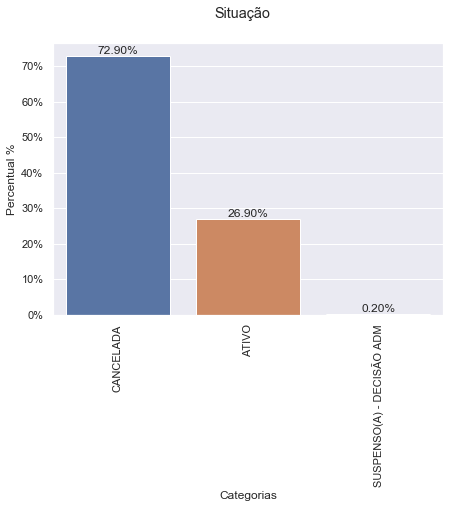

In [7]:
gráficos(dist_freq_cat['Situação'], 'Situação')

<p> Para as empresas canceladas, as principais razões para cancelamento são em atendimento a normas específicas da CVM, como demonstra o gráfico em sequência. Claramente o objetivo deste estudo não é se aprofundar em questões jurídicas, mas uma rápida pesquisa na internet pode esclarecer o que significam alguns dos valores do eixo x do gráfico. Por exemplo, esta <a href="http://www.cvm.gov.br/export/sites/cvm/legislacao/notas-explicativas/anexos/nota008.pdf">nota explicativa</a> da CVM clarifica sobre o que seria o "Atendimento As Normas da Instr CVM 03/78". </p>
<p> Segundo a mesma, com o advento da Lei das Sociedades por Ações em 1976 (alguns dias após a criação da própria CVM), foram consideradas registradas automaticamente na CVM todas as companhias à época com registro no Banco Central. Além disso, a lei dispunha que companhia aberta é aquela cujos seus valores mobiliários são admitidos à negociação em bolsa ou em balcão, e que uma companhia apenas poderia acessar os mercados caso houvesse registro na CVM. Ou seja, para que uma empresa fosse considerada fechada, deveria obter o cancelamento do registro junto à CVM, por isso a sinalização de "Atendimento As Normas da Instr CVM 03/78". </p>

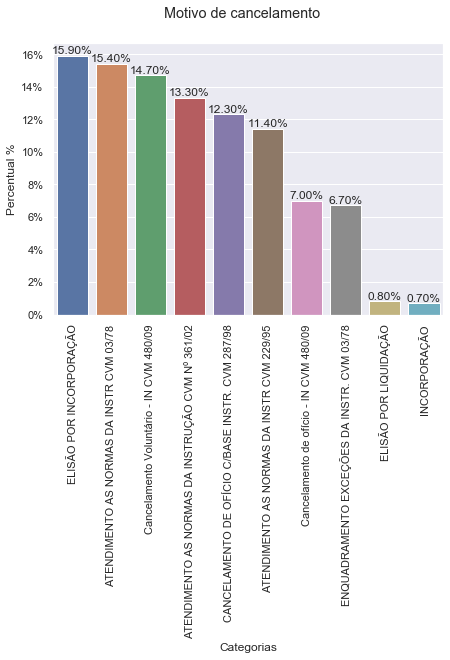

In [8]:
gráficos(dist_freq_cat['Motivo de cancelamento'], 'Motivo de cancelamento')

<p> Outra razão para cancelamento ocorreu com o advento da  <a href="http://www.cvm.gov.br/legislacao/instrucoes/inst480.html">ICVM 480</a> , como sinalizado no gráfico acima em "Cancelamento Voluntário - IN CVM 480/09", a qual criou as categorias de registro de emissores junto à CVM. Com o objetivo de distinguir o acesso ao mercado para empresas de diferentes portes e que gostariam de interagir com o mercado de formas distintas, foram criadas as Categorias A e B de emissores. Empresas registradas no primeiro grupo estão aptas a negociar quaisquer valores mobiliários nos mercados regulados de valores mobiliários, enquanto as do segundo grupo ficam impedidas de negociar ações, certificados de depósito de ações ou quaisquer valores mobiliários que deem o direito ao titular de conversão a um destes valores mobiliários citados. </p>
<p> Tal análise nos leva ao nosso próximo gráfico, abaixo, que revela como a maioria das companhias abertas registradas são da categoria A (cerca de 70%) frente a apenas cerca de 30% da categoria B. </p> <a name= 'Categorias'>

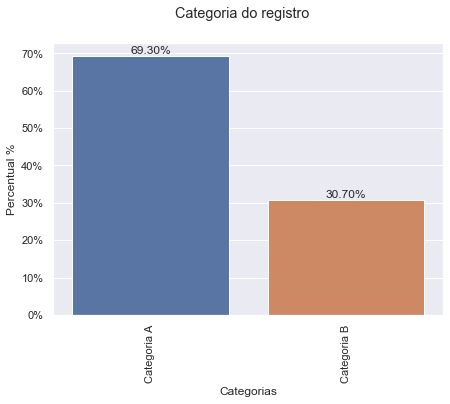

In [9]:
gráficos(dist_freq_cat['Categoria do registro'], 'Categoria do registro')

<p> Já quanto aos setores de atividade das companhias abertas, podemos constatar que não há uma concentração clara em apenas um setor, tendo alguns deles apenas 1 representante, inclusive. Destacam-se os setores relacionados a indústria pesada / de base (metalurgia e siderurgia, assim como máquinas, equipamentos, etc.), construção civil, de participações, finanças (bancos e securitização de recebíveis) e de bens de consumo (alimentação, e têxtil e vestuário). </p>

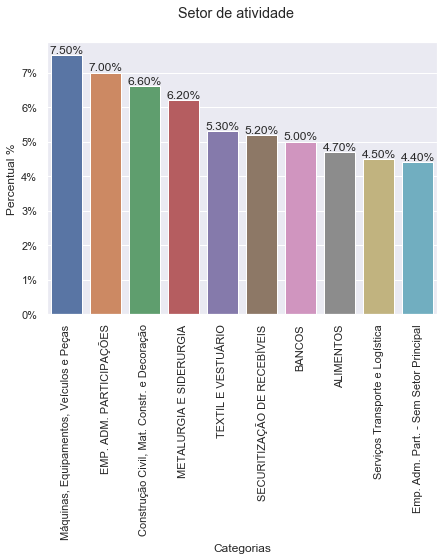

In [10]:
gráficos(dist_freq_cat['Setor de atividade'], 'Setor de atividade')

<p> Referentes aos auditores, o gráfico abaixo nos revela que cerca de metade das companhias abertas brasiliera é auditada por uma Big Four, concentração esta que certamente é elevada, porém significativamente menor quando comparada com a  <a href="https://nbviewer.jupyter.org/github/uchoa91/Jupyter-noteboks/blob/master/Info%20cadastrais.ipynb">concentração na indústria de fundos de investimento</a>.</p>

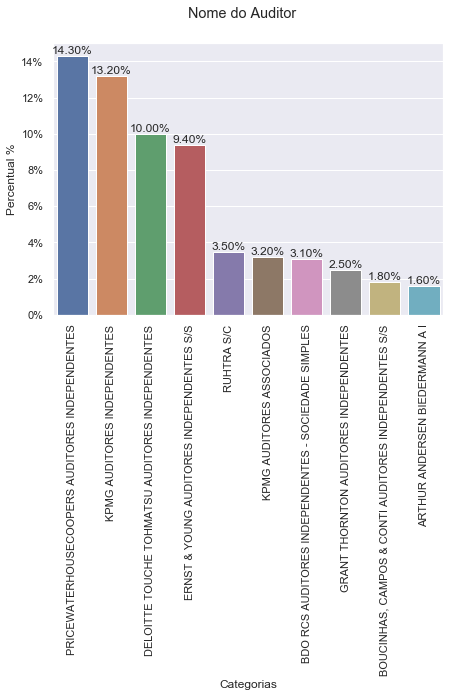

In [11]:
gráficos(dist_freq_cat['Nome do Auditor'], 'Nome do Auditor')

<p> Refletindo as diferenças de desenvolvimento entre as regiões do país, o gráfico a seguir mostra que quase metade das companhias abertas têm sua sede no estado de São Paulo, ou que cerca de 85% das sedes estão localizadas na Região Sudeste ou Sul do país.</p>

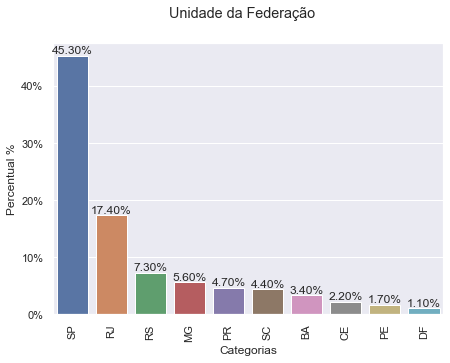

In [12]:
gráficos(dist_freq_cat['Unidade da Federação'], 'Unidade da Federação')

<p> Podemos utilizar também as colunas "Data de registro" e "Data de cancelamento" para avaliar de maneira temporal o número de companhias abertas registradas, encerradas e em funcionamento. O código a seguir cria a tabela auxiliar que servirá como base para o gráfico que resumirá estas informações. </p>

In [13]:
mínimo = informações_cadastrais_cias_abertas['Data de registro'].min()
máximo = informações_cadastrais_cias_abertas['Data de registro'].max()

index_datas = pd.date_range(start = mínimo, end= máximo)
abertura_fechamento_empresas = pd.DataFrame(index=index_datas, columns = ['Registradas', 'Encerradas'])

tot_registradas = 0
tot_encerradas = 0
for dia in abertura_fechamento_empresas.index:
    tot_registradas = tot_registradas + informações_cadastrais_cias_abertas['Data de registro'].isin([dia]).sum()
    tot_encerradas = tot_encerradas + informações_cadastrais_cias_abertas['Data de cancelamento'].isin([dia]).sum()
    abertura_fechamento_empresas.loc[dia, 'Registradas'] = tot_registradas
    abertura_fechamento_empresas.loc[dia, 'Encerradas'] = tot_encerradas
    
abertura_fechamento_empresas['Em Funcionamento'] = abertura_fechamento_empresas['Registradas'] - abertura_fechamento_empresas['Encerradas']

<p> Observa-se pelo gráfico abaixo que a primeira companhia aberta brasileira foi registrada na década de 1920, porém apenas na década de 1970 que a quantidade deste tipo de companhia cresceu de maneira mais significativa, muito provavelmente impulsionadas com o advento da Lei das S/A's. Interessante notar também que tais companhias começaram a ser fechadas apenas na metade da década de 1980, justamente um dos períodos de pico na quantidade de companhias em funcionamento (com mais de 1000 companhias abertas), junto ao período de final da década de 1990 e início dos anos 2000. Desde então a tendência têm sido de maior encerramento do que de registro de empresas, levando aos atuais 609 companhias ativas. </p>

C:\Users\marce\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


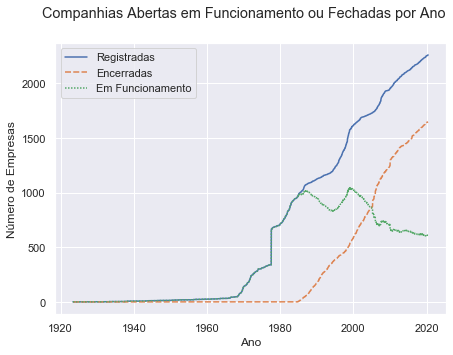

In [14]:
sns.set(style='darkgrid')
fig = plt.figure(figsize = [7,5])
g = sns.lineplot(data = abertura_fechamento_empresas)
plt.xlabel('Ano')
plt.ylabel('Número de Empresas')
plt.suptitle('Companhias Abertas em Funcionamento ou Fechadas por Ano')
plt.show()

<p> Outra visualização que podemos fazer é da "idade" relativa das empresas, agrupadas pelas suas respectivas situações ("ativa" ou "cancelada"). Para o primeiro grupo calculamos o tempo, em anos completos, desde a sua data de registro até hoje, enquanto para o segundo grupo calculamos a diferença entre a data de registro e de cancelamento. O código a seguir realiza estes cálculos e apresenta dois histogramas com a frequência relativa (em percentual) para cada grupo de forma individual, sendo um coma frequência acumualda e o outro não. </p>

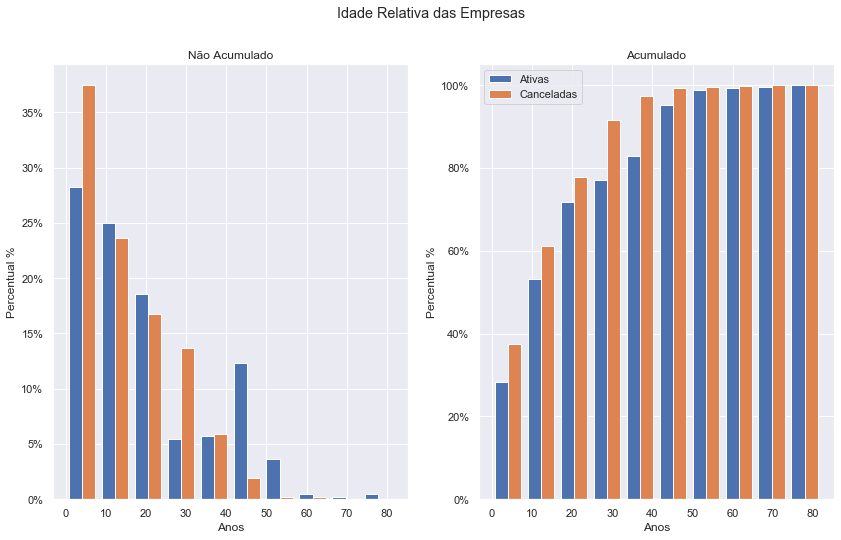

In [102]:
ativos = informações_cadastrais_cias_abertas[informações_cadastrais_cias_abertas['Situação'] == 'ATIVO']

ativ = (pd.to_datetime(date.today()) - ativos['Data de registro']) // pd.Timedelta(days = 365)
canc = (informações_cadastrais_cias_abertas['Data de cancelamento'] - informações_cadastrais_cias_abertas['Data de registro']).dropna() // pd.Timedelta(days = 365.2425)
at_w = np.empty(ativ.shape)
at_w.fill(1/ativ.shape[0])
ca_w = np.empty(canc.shape)
ca_w.fill(1/canc.shape[0])

sns.set(style='darkgrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,8))

ax1.hist([ativ, canc], label = ['Ativas', 'Canceladas'], weights = [at_w, ca_w])
ax1.set_yticklabels(['{:.0f}%'.format(x*100) for x in ax1.get_yticks()])
ax1.set_title('Não Acumulado')
ax1.set_xlabel('Anos')
ax1.set_ylabel('Percentual %')

ax2.hist([ativ, canc], label = ['Ativas', 'Canceladas'], weights = [at_w, ca_w], cumulative = True)
ax2.set_yticklabels(['{:.0f}%'.format(x*100) for x in ax2.get_yticks()])
ax2.set_title('Acumulado')
ax2.set_xlabel('Anos')
ax2.set_ylabel('Percentual %')

plt.legend(loc = 'upper left')
plt.suptitle('Idade Relativa das Empresas')
plt.show()

<p> Tais gráficos nos revelam algo interessante, já constatado em outros estudos sobre a sobrevivência de empresas: quanto mais "jovem" a empresa, maior a probabilidade que ela seja cancelada. </p>
<p> Seguimos agora com a análise do arquivo de <a name= '2.2 - ISIN'>ISIN</a> (ativos) da B3. Vejamos as cinco primeiras linhas do arquivo para ter um primeiro contato com a base de dados. </p> 

In [103]:
isin.head()

,DATA DA GERAÇÃO DO ARQUIVO,AÇÃO SOFRIDA PELA INFORMAÇÃO,CÓDIGO ISIN,CODIGO EMISSOR,CODIGO CFI,DESCRICAO,ANO EMISSAO,DATA EMISSAO,ANO EXPIRACAO,DATA EXPIRACAO,...,TIPO DE VENCIMENTO,TIPO DE PROTEÇÃO,TIPO POLITICA DISTRIBUIÇÃO FUNDOS,TIPO POLÍTCA DE INVESTIMENTO DO FUNDO,TIPO FORMA,TIPO ESTILO OPÇÃO,NÚMERO DE SÉRIE DE OPÇÃO,CÓDIGO FREQUENCIA DE JUROS,SITUAÇÃO ISIN,DATA DO PRIMEIRO PAGAMENTO DE JUROS
0,2020-05-15,A,BR0002CTF008,0002,CIOGMY,COTAS SENIORES,NaN,NaT,NaN,nan,...,NaN,NaN,G,M,R,NaN,NaN,NaN,A,NaT
1,2020-05-15,A,BR0002CTF016,0002,CIOGMY,COTAS SUBORDINADAS,NaN,NaT,NaN,nan,...,NaN,NaN,G,M,R,NaN,NaN,NaN,A,NaT
2,2020-05-15,N,BR0003CTF006,0003,CIOGLY,COTAS,NaN,NaT,NaN,nan,...,NaN,NaN,G,L,R,NaN,NaN,NaN,A,NaT
3,2020-05-15,N,BR0004CTF004,0004,CIOILY,COTAS,NaN,NaT,NaN,nan,...,NaN,NaN,I,L,R,NaN,NaN,NaN,A,NaT
4,2020-05-15,N,BR0005CTF001,0005,CIOGLY,COTAS,NaN,NaT,NaN,nan,...,NaN,NaN,G,L,R,NaN,NaN,NaN,A,NaT


<p> Constata-se que algumas das colunas, como "Ação sofrida pela informação", "Tipo política distribuição fundos", "Tipo política de investimento do fundo", "Tipo forma", entre outras, apresentam apenas letras em sua composição. 
    
<p> Analisando o arquivo "Leiame.pdf" é possível encontrar a correspondência entre as siglas e seu significado. A utilização de siglas é prática comum em arquivos muito grandes com o objetivo de reduzir seu tamanho final, porém podem gerar pouca informação prática em análises exploratórias como esta. Por esta razão vamos substituir as siglas por seus valores originais. </p>

<p> Podemos criar um "mapping" utilizando as informações do arquivo "Leiame.pdf" e substituir com o método .replace( ), conforme código abaixo. Utilizaremos o método .head( ) novamente com o objetivo de atestar a mudança.</p>

In [104]:
mapping = {
            'TIPO DE EMISSÃO':{'D':'Domestica','I':'Internacional'},
            'TIPO ATIVO OBJETO':{'S':'Ação / Renda Variável','D':'Renda Fixa','T':'Commodities','I':'Índices','F':'Futuro','B':'Cesta','N':'Taxa De Juros','C':'Moeda','O':'Opção','W':'Swap','M':'Outros'},
            'TIPO DE ENTREGA':{'P':'Física','C':'Financeira'},
            'TIPO DE JUROS':{'Z':'Zero (Taxa De Desconto)','F':'Fixo','V':'Variável'},
            'TIPO DE MERCADO':{'S':'Padronizada','N':'Não Padronizada'},
            'TIPO STATUS ISIN':{'N':'Isin Novo','R':'Isin Reutilizado'},
            'TIPO DE PROTEÇÃO':{'S':'Protegido','N':'Não Protegido'},
            'TIPO DE VENCIMENTO':{'A':'Plano De Amortização','B':'Plano Amortização C/ Resgate Antecipado','Q':'Perpetuo Com Opção De Resgate','P':'Perpetuo','F':'Vencimento Fixo','G':'Resgate Antecipado'},
            'TIPO POLITICA DISTRIBUIÇÃO FUNDOS':{'I':'Fundo de Renda','G':'Fundo de Crescimento','M':'Fundo Misto'},
            'TIPO POLÍTCA DE INVESTIMENTO DO FUNDO':{'R':'Imobiliário','B':'Renda Fixa','E':'Ações','V':'Ativos conversíveis','L':'Diferentes ativos','C':'Commodities','D':'Derivativos','F':'Instrumentos de Referência','M':'Outros'},
            'TIPO DE GARANTIA':{'T':'Garantido Pelo Tesouro','G':'Garantia P/ Terceiros (Fiança)','S':'Garantia Real','UF':'Flutuante','US':'Subordinada','UQ':'Quirografária'},
            'TIPO FORMA':{'R':'Nominativo'},
            'TIPO ESTILO OPÇÃO':{'A':'Americana','E':'Européia'},
            'CÓDIGO FREQUENCIA DE JUROS':{'A':'Anual','B':'Bi-Anual','M':'Mensal','Q':'Trimestral','S':'Semestral','W':'Semanal','X':'Outros'},
            'SITUAÇÃO ISIN':{'A':'Ativo','I':'Inativo'},
            'CÓDIGO ESPÉCIE':{'OR':'Ordinárias','PA':'Preferenciais Classe A','PB':'Preferenciais Classe B','PC':'Preferenciais Classe C','PD':'Preferenciais Classe D','PE':'Preferenciais Classe E','PF':'Preferenciais Classe F','PG':'Preferenciais Classe G','PH':'Preferenciais Classe H','PR':'Preferenciais'},
            'TIPO DE ATIVO':{'CTF':'COTAS','DBM':'DEBENTURES MISCELANIAS','CRI':'CERTIFICADOS DE RECEBIVEIS IMOBILIARIOS','CRA':'CERTIFICADOS DE RECEBIVEIS DO AGRONEGOCIO','NPM':'NOTA PROMISSORIA','PCT':'PRECATORIO','PCD':'POSICAO CONSOLIDADA DA DIVIDA','LR':'LETRAS DE CREDITO AGRONEGOCIO','LO':'LETRAS DE CREDITO AGRONEGOCIO','LN':'LETRAS DE CREDITO AGRONEGOCIO','LG':'LETRAS DE CREDITO AGRONEGOCIO','LE':'LETRAS DE CREDITO AGRONEGOCIO','LA':'LETRAS DE CREDITO AGRONEGOCIO','GR':'LETRAS DE CREDITO AGRONEGOCIO','GO':'LETRAS DE CREDITO AGRONEGOCIO','GN':'LETRAS DE CREDITO AGRONEGOCIO','GE':'LETRAS DE CREDITO AGRONEGOCIO','O':'LETRAS DE CREDITO AGRONEGOCIO','L':'LETRAS DE CREDITO AGRONEGOCIO','AN':'LETRAS DE CREDITO AGRONEGOCIO','AG':'LETRAS DE CREDITO AGRONEGOCIO','DBS':'DEBENTURES SIMPLES','C':'CERTIFICADO DE DEPOSITO BANCARIO','DI':'DEPOSITO INTERFINANCEIRO','LC':'LETRA DE CAMBIO','LH':'LETRA HIPOTECARIA','RDB':'RECIBO DE DEPOSITO BANCARIO','CPD':'CEDULA PIGNORATICIA DE DEBENTURES','DP':'DEPÓSITO A PRAZO COM GARANTIA ESPECIAL DO FGC','LCM':'LETRA DE CREDITO IMOBILIARIO','LCI':'LETRA DE CREDITO IMOBILIARIO','LCB':'LETRA DE CREDITO IMOBILIARIO','LTI':'LETRA DE CREDITO IMOBILIARIO','LMB':'LETRA DE CREDITO IMOBILIARIO','LIM':'LETRA DE CREDITO IMOBILIARIO','LIC':'LETRA DE CREDITO IMOBILIARIO','ADA':'ALONGAMENTO DA DÍVIDA AGRÍCOLA','TD':'TÍTULO DA DÍVIDA AGRÁRIA','BTN':'BONUS DO TESOURO NACIONAL','CFT':'CERTIFICADO FINANCEIRO DO TESOURO','LF':'LETRAS FINANCEIRAS DO TESOURO','LFA':'LETRAS FINANCEIRAS DO TESOURO SERIE A','LFB':'LETRAS FINANCEIRAS DO TESOURO SERIE B','LFT':'LETRAS FINANCEIRAS DO TESOURO','LTN':'LETRAS DO TESOURO NACIONAL','NI':'NOTAS DO TESOURO NACIONAL SERIE I','NT':'NOTAS DO TESOURO NACIONAL SERIE I','NTA':'NOTAS DO TESOURO NACIONAL SERIE A','NTB':'NOTAS DO TESOURO NACIONAL SERIE B','NTC':'NOTAS DO TESOURO NACIONAL SERIE C','NTD':'NOTAS DO TESOURO NACIONAL SERIE D','NTE':'NOTAS DO TESOURO NACIONAL SERIE E','NTF':'NOTAS DO TESOURO NACIONAL SERIE F','NTH':'NOTAS DO TESOURO NACIONAL SERIE H','NTJ':'NOTAS DO TESOURO NACIONAL SERIE J','NTL':'NOTAS DO TESOURO NACIONAL SERIE L','NTM':'NOTAS DO TESOURO NACIONAL SERIE M','NTP':'NOTAS DO TESOURO NACIONAL SERIE P','NTR':'NOTAS DO TESOURO NACIONAL SERIE R2','NTS':'NOTAS DO TESOURO NACIONAL SERIE S','NTT':'NOTAS DO TESOURO NACIONAL SERIE T','NTU':'NOTAS DO TESOURO NACIONAL SERIE U','LFC':'LETRA FINANCEIRA','LTR':'LETRA FINANCEIRA','LTF':'LETRA FINANCEIRA','LFR':'LETRA FINANCEIRA','LFN':'LETRA FINANCEIRA','LFI':'LETRA FINANCEIRA','BBC':'BONUS DO BANCO CENTRAL','CA':'CERTIFICADO DE DEPOSITO AGROPECUARIO','CDB':'CERTIFICADO DE DEPOSITO BANCARIO','CDC':'CERTIFICADOS DE DIREITOS CREDITORIOS DO AGRONEGOCIO','CDE':'CEDULA DE DEBENTURES','CDP':'CERTIFICADO DA DIVIDA PUBLICA MOBILIARIA FEDERAL - CDP/INSS','CDS':'CERTIFICADO DE DEPOSITO BANCARIO SUBORDINADO','CML':'CERTIFICADO DE DEPOSITO DE MEDIO OU LONGO PRAZO','CPB':'CERTIFICADO DE PRIVATIZACAO BACEN','CPC':'CERTIFICADO DE PRIVATIZACAO CETIP','CRC':'CONTAS DE RESULTADOS A COMPENSAR - CRC','CSC':'CREDITO SECURITIZADO','CTE':'CERTIFICADOS A TERMO DE ENERGIA ELETRICA','LAM':'LETRA DE ARRENDAMENTO MERCANTIL','LBC':'LETRAS DO BANCO CENTRAL','NBC':'NOTAS DO BANCO CENTRAL','NCE':'NOTAS DE CREDITO A EXPORTACAO','NJF':'NOTAS A JUROS FLUTUANTES','NOT':'NOTAS','TDE':'TITULO DA DIVIDA EXTERNA','WA':'WARRANT AGROPECUARIO','WTS':'WARRANTS RENDA FIXA','DBO':'DEBENTURES CONVERSIVEIS EM ACOES ORDINARIAS','DBP':'DEBENTURES CONVERSIVEIS EM ACOES PREFERENCIAIS','ACC':'ACOES CONVERSIVEIS','Z':'ACOES RESGATAVEIS COM DIREITOS DIFERENCIADOS','ACN':'ACOES NOMINATIVAS','A':'ACOES COM DIREITOS DIFERENCIADOS','ARN':'ACOES RESGATAVEIS','BDR':'CERTIFICADO DE DEPOSITO DE VALORES MOBILIARIOS','CDA':'CERTIFICADO DE DEPOSITO DE ACOES','E':'RECIBOS RESGATÁVEIS','R':'RECIBOS','PPA':'PROTECAO DO INVESTIMENTO COM PARTICIPACAO – POP PNA','PPM':'PROTECAO DO INVESTIMENTO COM PARTICIPACAO – POP MISCELANEAS','PPO':'PROTECAO DO INVESTIMENTO COM PARTICIPACAO – POP ON','PPP':'PROTECAO DO INVESTIMENTO COM PARTICIPACAO – POP PN','19':'CONTRATO FUTURO DE UNITS','10':'CONTRATO FUTURO DE UNITS','1Y':'CONTRATO FUTURO DE UNITS','1Z':'CONTRATO FUTURO DE UNITS','R3':'CONTRATO DE ROLAGEM DE FUTURO DE AÇÕES ON','R4':'CONTRATO DE ROLAGEM DE FUTURO DE AÇÕES PN','R5':'CONTRATO DE ROLAGEM DE FUTURO DE AÇÕES PNA','R6':'CONTRATO DE ROLAGEM DE FUTURO DE AÇÕES PNB','R7':'CONTRATO DE ROLAGEM DE FUTURO DE AÇÕES PNC','R8':'CONTRATO DE ROLAGEM DE FUTURO DE AÇÕES PND','R1':'CONTRATO DE ROLAGEM DE FUTURO DE UNITS','WSP':'FUTURO SOBRE MICRO S&P','WS1':'FUTURO ROLAGEM DE MICRO S&P','EUP':'CONTRATO FUTURO DE USD POR EUR','GBR':'CONTRATO FUTURO DE USD POR GBP','AUS':'CONTRATO FUTURO DE USD POR AUD','JAP':'CONTRATO FUTURO DE JPY POR USD','CAN':'CONTRATO FUTURO DE CAD POR USD','NZL':'CONTRATO FUTURO DE USD POR NZD','SWI':'CONTRATO FUTURO DE CHF POR USD','MEX':'CONTRATO FUTURO DE MXN POR USD','TUQ':'CONTRATO FUTURO DE TRY POR USD','CHL':'CONTRATO FUTURO DE CLP POR USD','NOK':'CONTRATO FUTURO DE NOK POR USD','SEK':'CONTRATO FUTURO DE SEK POR USD','RUB':'CONTRATO FUTURO DE RUB POR USD','CNH':'CONTRATO FUTURO DE CNH POR USD','T02':'CONTRATO FUTURO DE TREASURY NOTES DE 2 ANOS','T05':'CONTRATO FUTURO DE TREASURY NOTES DE 5 ANOS','T30':'CONTRATO FUTURO DE TREASURY NOTES DE 30 ANOS','INK':'CONTRATO FUTURO DE ÍNDICE NIKKEI','IMV':'CONTRATO FUTURO DE ÍNDICE MERVAL','MV1':'CONTRATO FUTURO DE ROLAGEM DE ÍNDICE MERVAL','NK1':'CONTRATO FUTURO DE ROLAGEM DE ÍNDICE NIKKEI','35':'CONTRATO FUTURO DE AÇÕES ORDINÁRIAS','36':'CONTRATO FUTURO DE AÇÕES ORDINÁRIAS','37':'CONTRATO FUTURO DE AÇÕES ORDINÁRIAS','38':'CONTRATO FUTURO DE AÇÕES ORDINÁRIAS','39':'CONTRATO FUTURO DE AÇÕES ORDINÁRIAS','30':'CONTRATO FUTURO DE AÇÕES ORDINÁRIAS','3Y':'CONTRATO FUTURO DE AÇÕES ORDINÁRIAS','3Z':'CONTRATO FUTURO DE AÇÕES ORDINÁRIAS','41':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS','42':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS','43':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS','44':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS','45':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS','46':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS','47':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS','48':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS','49':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS','40':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS','4Y':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS','4Z':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS','51':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS CLASSE A','52':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS CLASSE A','53':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS CLASSE A','54':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS CLASSE A','55':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS CLASSE A','56':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS CLASSE A','57':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS CLASSE A','58':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS CLASSE A','59':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS CLASSE A','50':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS CLASSE A','5Y':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS CLASSE A','5Z':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS CLASSE A','61':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS CLASSE B','62':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS CLASSE B','63':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS CLASSE B','64':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS CLASSE B','65':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS CLASSE B','66':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS CLASSE B','67':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS CLASSE B','68':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS CLASSE B','69':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS CLASSE B','60':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS CLASSE B','6Y':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS CLASSE B','6Z':'CONTRATO FUTURO DE AÇÕES PREFERENCIAIS CLASSE B','71':'CONTRATO FUTURO DE OUTROS','72':'CONTRATO FUTURO DE OUTROS','73':'CONTRATO FUTURO DE OUTROS','74':'CONTRATO FUTURO DE OUTROS','75':'CONTRATO FUTURO DE OUTROS','76':'CONTRATO FUTURO DE OUTROS','77':'CONTRATO FUTURO DE OUTROS','78':'CONTRATO FUTURO DE OUTROS','79':'CONTRATO FUTURO DE OUTROS','70':'CONTRATO FUTURO DE OUTROS','7Y':'CONTRATO FUTURO DE OUTROS','7Z':'CONTRATO FUTURO DE OUTROS','11':'CONTRATO FUTURO DE UNITS','12':'CONTRATO FUTURO DE UNITS','13':'CONTRATO FUTURO DE UNITS','14':'CONTRATO FUTURO DE UNITS','15':'CONTRATO FUTURO DE UNITS','16':'CONTRATO FUTURO DE UNITS','17':'CONTRATO FUTURO DE UNITS','18':'CONTRATO FUTURO DE UNITS','DOL':'CONTRATO FUTURO DE DOLAR COMERCIAL','DOM':'CONTRATO FUTURO DE DOLAR COMERCIAL FRACIONARIO','EBR':'CONTRATO FUTURO DE EURO  (EBR)','EN2':'CONTRATO FUTURO DE ETANOL LEILAO','ET1':'CONTRATO DE ROLAGEM DE ETANOL HIDRATADO','ETH':'CONTRATO FUTURO DE ETANOL HIDRATADO','ETN':'CONTRATO FUTURO DE ETANOL ANIDRO','EUR':'CONTRATO FUTURO DE EURO','FRG':'CONTRATO FUTURO DE IGP-M - ESTRATEGIA','FRI':'CONTRATO FUTURO DE IPCA - ESTRATEGIA','FRM':'CONTRATO FUTURO DE FRA DE IGP-M','FRO':'CONTRATO FUTURO DE FRA DE CUPOM CAMBIAL DE OC1','GBP':'CONTRATO FUTURO DE LIBRA ESTERLINA','HSI':'CONTRATO FUTURO DE INDICE HANG SENG','IAP':'CONTRATO FUTURO DE IPCA','IBV':'CONTRATO FUTURO DO IBOVESPA','IC2':'CONTRATO FUTURO DE CAFE ARABICA LEILAO','ICF':'CONTRATO FUTURO DE CAFE ARABICA','IGF':'CONTRATO FUTURO FRACIONARIO DE IGP-M','IGM':'CONTRATO FUTURO DE IGP-M','INF':'CONTRATO FUTURO DO IBOVESPA FRACIONARIO','IS2':'CONTRATO FUTURO DE ACUCAR LEILAO','ISP':'CONTRATO FUTURO DE INDICE S&P 500','ISU':'CONTRATO FUTURO DE ACUCAR','JPY':'CONTRATO FUTURO DE IENE','JSE':'CONTRATO FUTURO DE INDICE FTSE/JSE','KFE':'CONTRATO FUTURO DE CAFE ARABICA 6/7','KR1':'CONTRATO FUTURO DE ROLAGEM CAFE ARABICA 7/6','LDI':'CONTRATO FUTURO DE DI LONGO','MIX':'CONTRATO FUTURO DE INDICE MICEX','MXN':'CONTRATO FUTURO DE PESO MEXICANO','NZD':'CONTRATO FUTURO DE DOLAR DA NOVA ZELANDIA','OC1':'CONTRATO FUTURO DE OPERACOES COMPROMISSADAS','OP2':'CONTRATO FUTURO DE MILHO LIQUIDACAO FINANCEIRA-OESTE PARANA','OZF':'CONTRATO FUTURO DE OURO DE 250 GRAMAS','PG2':'CONTRATO FUTURO DE MILHO COM LIQUIDACAO FINANCEIRA-PARANAGUA','RSP':'CONTRATO FUTURO DE ROLAGEM DE INDICE S&P 500','RV2':'CONTRATO FUTURO DE MILHO COM LIQUIDACAO FINANCEIRA-RIO VERDE','SFI':'CONTRATO FUTURO DE SOJA COM LIQUIDACAO FINANCEIRA','SJC':'CONTRATO FUTURO SOJA LIQUIDACAO PELO MINI SOJA CME GROUP','SO2':'CONTRATO FUTURO DE SOJA 27T LEILAO','SOI':'CONTRATO FUTURO DE SOJA 100T','SOJ':'CONTRATO FUTURO DE SOJA 27T','T10':'CONTRATO FUTURO DE TREASURY NOTES 10 ANOS','T18':'CONTRATO FUTURO A-BOND 2018','TM2':'CONTRATO FUTURO DE MILHO LIQUIDACAO FINANCEIRA-TRIANG MINEIR','TRY':'CONTRATO FUTURO DE LIRA TURCA','WBG':'CONTRATO FUTURO DE  BOI GORDO WEB','WD1':'MINICONTRATO DE ROLAGEM DOLAR COMERCIAL','WDL':'CONTRATO FUTURO DE DOLAR COMERCIAL FRACIONARIO WEB','WDO':'CONTRATO FUTURO MINI DE DOLAR','WEU':'CONTRATO FUTURO MINI DE EURO','WI1':'MINICONTRATO DE ROLAGEM DE IBOVESPA','WIN':'CONTRATO FUTURO DE IBOVESPA FRACIONARIO WEB','WTI':'CONTRATO MINI FUTURO DE PETROLEO DO CME GROUP','YBR':'CONTRATO FUTURO DE IENE','ZAR':'CONTRATO FUTURO DE RANDE DA AFRICA DO SUL','CFS':'CONTRATO FUTURO DE CAFÉ ARABICA','IDI':'CONTRATO FUTURO INDICE IDI','AFS':'CONTRATO FUTURO DE ZAR POR USD','31':'CONTRATO FUTURO DE AÇÕES ORDINÁRIAS','32':'CONTRATO FUTURO DE AÇÕES ORDINÁRIAS','33':'CONTRATO FUTURO DE AÇÕES ORDINÁRIAS','34':'CONTRATO FUTURO DE AÇÕES ORDINÁRIAS','BOZ':'CONTRATO DISPONIVEL PADRAO DE OURO DE 250 GRAMAS','DR2':'CONTRATO FUTURO DE ROLAGEM DE DOLAR','SC1':'CONTRATO FUTURO DE ROLAGEM','WCF':'CONTRATO FUTURO DE CAFE ARABICA MINI','ACF':'CONTRATO FUTURO DE ACUCAR CRISTAL','ACR':'CONTRATO FUTURO DE ROLAGEM DE ACUCAR CRISTAL','AL2':'CONTRATO FUTURO DE ALCOOL ANIDRO LEILAO','ALA':'CONTRATO FUTURO DE ALCOOL ANIDRO','ARB':'CONTRATO FUTURO TAXA DE CAMBIO DE REAIS POR PESO ARGENTINO','ARS':'CONTRATO FUTURO TAXA CAMBIO PESO ARGENTINO  DOLAR COMERCIAL','AUD':'CONTRATO FUTURO DE DOLAR AUSTRALIANO','B09':'CONTRATO FUTURO DE GLOBAL 2009','B10':'CONTRATO FUTURO DE GLOBAL 2010','B11':'CONTRATO FUTURO DE GLOBAL 2011','B12':'CONTRATO FUTURO DE GLOBAL 2012','B13':'CONTRATO FUTURO DE GLOBAL 2013','B14':'CONTRATO FUTURO DE GLOBAL 2014','B15':'CONTRATO FUTURO DE GLOBAL 2015','B17':'CONTRATO FUTURO DE GLOBAL 2017','B19':'CONTRATO FUTURO DE GLOBAL 2019','B20':'CONTRATO FUTURO DE GLOBAL 2020','B24':'CONTRATO FUTURO DE GLOBAL 2024','B25':'CONTRATO FUTURO DE GLOBAL 2025','B27':'CONTRATO FUTURO DE GLOBAL 2027','B30':'CONTRATO FUTURO DE GLOBAL 2030','B34':'CONTRATO FUTURO DE GLOBAL 2034','B37':'CONTRATO FUTURO DE GLOBAL 2037','B40':'CONTRATO FUTURO DE GLOBAL 2040','BC3':'CONTRATO FUTURO DE SWAP DE CREDITO DE 3 ANOS','BC5':'CONTRATO FUTURO DE SWAP DE CREDITO DE 5 ANOS','BC7':'CONTRATO FUTURO DE SWAP DE CREDITO DE 7 ANOS','BCB':'CONTRATO FUTURO DE C-BOND','BEI':'CONTRATO FUTURO DE EI-BOND','BG2':'CONTRATO FUTURO DE BOI GORDO LEILAO','BGI':'CONTRATO FUTURO DE BOI GORDO','BRI':'CONTRATO FUTURO DE INDICE BRASIL-50','BSE':'CONTRATO FUTURO DE INDICE SENSEX 30','BZ2':'CONTRATO FUTURO DE BEZERRO LEILAO','BZE':'CONTRATO FUTURO DE BEZERRO','CAD':'CONTRATO FUTURO DE DOLAR CANADENSE','CCS':'CONTRATO FUTURO DE MILHO – CAMPINAS','CCP':'CONTRATO FUTURO DE MILHO – CAMPINAS','CHF':'CONTRATO FUTURO DE FRANCO SUICO','CL2':'CONTRATO FUTURO DE CAFE CONILLON LEILAO','CLC':'CONTRATO FUTURO DE MILHO - LUCAS DO RIO VERDE','CLP':'CONTRATO FUTURO DE PESO CHILENO','CM2':'CONTRATO FUTURO DE MILHO COM LIQUIDACAO FINANCEIRA-CAMPINAS','CN2':'CONTRATO FUTURO DE MILHO LEILAO','CNI':'CONTRATO FUTURO DE MILHO','CNL':'CONTRATO FUTURO DE CAFE CONILLON','CNY':'CONTRATO FUTURO DE IUAN','CO2':'CONTRATO FUTURO DE ALGODAO LEILAO','COP':'CONTRATO FUTURO DE MILHO – OESTE DO PARANA','COT':'CONTRATO FUTURO DE ALGODAO','CPF':'CONTRATO FUTURO DE MILHO – PASSO FUNDO','CPG':'CONTRATO FUTURO DE MILHO - PARANAGUA','CRV':'CONTRATO FUTURO DE MILHO – RIO VERDE','CTM':'CONTRATO FUTURO DE MILHO – TRIANGULO MINEIRO','D1I':'CONTRATO FUTURO DE DI DE 1 DIA','D2I':'CONTRATO FUTURO DE DI DE 1 DIA','DAP':'CONTRATO FUTURO DE CUPOM DI VERSUS IPCA','DCO':'CONTRATO FUTURO DE CUPOM CAMBIAL DE OC1','DDI':'CONTRATO FUTURO DE CUPOM CAMBIAL','DDM':'CONTRATO FUTURO DE CUPOM DE DI VERSUS IGPM','FCS':'OPCAO DE COMPRA FLEXIVEL DE TAXA DE JUROS','FPS':'OPCAO DE VENDA FLEXIVEL DE TAXA DE JUROS','FCA':'OPCAO FLEXIVEL DE COMPRA DE ACAO','FBC':'OPCAO FLEXIVEL DE COMPRA DE BOVA11','FCE':'OPCAO FLEXIVEL DE COMPRA DE EURO','FCI':'OPCAO FLEXIVEL DE COMPRA DE IBOVESPA','FCX':'OPCAO FLEXIVEL DE COMPRA DE IBRX 50','FCJ':'OPCAO FLEXIVEL DE COMPRA DE IENE','FCM':'OPCAO FLEXIVEL DE COMPRA DE METAL','FXC':'OPCAO FLEXIVEL DE COMPRA SOBRE BRAX11','FCC':'OPCAO FLEXIVEL DE COMPRA SOBRE CSMO11','FFC':'OPCAO FLEXIVEL DE COMPRA SOBRE FIND11','FGC':'OPCAO FLEXIVEL DE COMPRA SOBRE GOVE11','FIC':'OPCAO FLEXIVEL DE COMPRA SOBRE ISUS11','FLC':'OPCAO FLEXIVEL DE COMPRA SOBRE MILA11','FMC':'OPCAO FLEXIVEL DE COMPRA SOBRE MOBI11','FSC':'OPCAO FLEXIVEL DE COMPRA SOBRE SMAL11','OCS':'OPCAO FLEXIVEL DE COMPRA SOJA FUTURO','FPA':'OPCAO FLEXIVEL DE VENDA DE ACAO','FBP':'OPCAO FLEXIVEL DE VENDA DE BOVA11','FPE':'OPCAO FLEXIVEL DE VENDA DE EURO','FPI':'OPCAO FLEXIVEL DE VENDA DE IBOVESPA','FPX':'OPCAO FLEXIVEL DE VENDA DE IBRX 50','FPJ':'OPCAO FLEXIVEL DE VENDA DE IENE','FPM':'OPCAO FLEXIVEL DE VENDA DE METAL','FXP':'OPCAO FLEXIVEL DE VENDA SOBRE BRAX11','FCP':'OPCAO FLEXIVEL DE VENDA SOBRE CSMO11','FFP':'OPCAO FLEXIVEL DE VENDA SOBRE FIND11','FGP':'OPCAO FLEXIVEL DE VENDA SOBRE GOVE11','FIP':'OPCAO FLEXIVEL DE VENDA SOBRE ISUS11','FLP':'OPCAO FLEXIVEL DE VENDA SOBRE MILA11','FMP':'OPCAO FLEXIVEL DE VENDA SOBRE MOBI11','FSP':'OPCAO FLEXIVEL DE VENDA SOBRE SMAL11','OVS':'OPCAO FLEXIVEL DE VENDA SOJA FUTURO','OFC':'OPCAO DE COMPRA FLEXIVEL DE TAXA DE CAMBIO','OFV':'OPCAO DE VENDA FLEXIVEL DE TAXA DE CAMBIO','ADI':'CONTRATO A TERMO DE DI COM AJUSTE','OZT':'CONTRATO A TERMO DE OURO DE 250 GRAMAS','TMC':'CONTRATO A TERMO DE TAXA DE CAMBIO','TME':'TERMO DE MERCADORIA ENERGIA','TMM':'TERMO DE METAL','TUY':'TERMO EM DOLAR DE MISCELANEAS','TSY':'TERMO FLEXIVEL DE MISCELANEAS','TRM':'TERMO MERCADORIA','TNY':'TERMO NORMAL DE MISCELANEAS','TNA':'TERMO NORMAL DE ACOES PREFERENCIAIS CLASSE A','TNB':'TERMO NORMAL DE ACOES PREFERENCIAIS CLASSE B','TNC':'TERMO NORMAL DE ACOES PREFERENCIAIS CLASSE C','TND':'TERMO NORMAL DE ACOES PREFERENCIAIS CLASSE D','TNE':'TERMO NORMAL DE ACOES PREFERENCIAIS CLASSE E','TNF':'TERMO NORMAL DE ACOES PREFERENCIAIS CLASSE F','TNG':'TERMO NORMAL DE ACOES PREFERENCIAIS CLASSE G','TNH':'TERMO NORMAL DE ACOES PREFERENCIAIS CLASSE H','TNM':'TERMO NORMAL DE COTAS','TNO':'TERMO NORMAL DE ACOES ORDINARIAS','TNP':'TERMO NORMAL DE ACOES PREFERENCIAIS','TNR':'TERMO NORMAL DE BDRS','TNS':'TERMO NORMAL DE RECIBOS DE CARTEIRA SELECIONADA DE ACOES','TNU':'TERMO NORMAL DE UNITS / CDA','TNV':'TERMO NORMAL DE ACOES PREFERENCIAIS COM DIREITO A VOTO','TPP':'TERMO EM PONTOS DE ACOES PREFERENCIAIS','TSA':'TERMO FLEXIVEL DE ACOES PREFERENCIAIS CLASSE A','TSB':'TERMO FLEXIVEL DE ACOES PREFERENCIAIS CLASSE B','TSC':'TERMO FLEXIVEL DE ACOES PREFERENCIAIS CLASSE C','TSD':'TERMO FLEXIVEL DE ACOES PREFERENCIAIS CLASSE D','TSE':'TERMO FLEXIVEL DE ACOES PREFERENCIAIS CLASSE E','TSF':'TERMO FLEXIVEL DE ACOES PREFERENCIAIS CLASSE F','TSG':'TERMO FLEXIVEL DE ACOES PREFERENCIAIS CLASSE G','TSH':'TERMO FLEXIVEL DE ACOES PREFERENCIAIS CLASSE H','TSM':'TERMO FLEXIVEL DE COTAS','TSO':'TERMO FLEXIVEL DE ACOES ORDINARIAS','TSP':'TERMO FLEXIVEL DE ACOES PREFERENCIAIS','TSR':'TERMO FLEXIVEL DE BDRS','TSS':'TERMO FLEXIVEL DE RECIBO DE CARTEIRA SELECIONADA DE ACOES','TSU':'TERMO FLEXIVEL DE UNITS / CDA','TSV':'TERMO FLEXIVEL DE ACOES PREFERENCIAIS COM DIREITO A VOTO','TUA':'TERMO EM DOLAR DE ACOES PREFERENCIAIS CLASSE A','TUB':'TERMO EM DOLAR DE ACOES PREFERENCIAIS CLASSE B','TUC':'TERMO EM DOLAR DE ACOES PREFERENCIAIS CLASSE C','TUD':'TERMO EM DOLAR DE ACOES PREFERENCIAIS CLASSE D','TUE':'TERMO EM DOLAR DE ACOES PREFERENCIAIS CLASSE E','TUF':'TERMO EM DOLAR DE ACOES PREFERENCIAIS CLASSE F','TUG':'TERMO EM DOLAR DE ACOES PREFERENCIAIS CLASSE G','TUH':'TERMO EM DOLAR DE ACOES PREFERENCIAIS CLASSE H','TUM':'TERMO EM DOLAR DE COTAS','TUO':'TERMO EM DOLAR DE ACOES ORDINARIAS','TUP':'TERMO EM DOLAR DE ACOES PREFERENCIAIS','TUR':'TERMO EM DOLAR DE BDRS','TUS':'TERMO EM DOLAR DE RECIBO DE CARTEIRA SELECIONADA DE ACOES','TUU':'TERMO EM DOLAR DE UNITS / CDA','TUV':'TERMO EM DOLAR DE ACOES PREFERENCIAIS COM DIREITO A VOTO','TNI':'TERMO NORMAL DE ACOES PREFERENCIAIS CLASSE I','TSI':'TERMO FLEXIVEL DE ACOES PREFERENCIAIS CLASSE I','TUI':'TERMO EM DOLAR DE AÇÕES PREFERENCIAIS CLASSE I','TNJ':'TERMO NORMAL DE ACOES PREFERENCIAIS CLASSE J','TSJ':'TERMO FLEXIVEL DE ACOES PREFERENCIAIS CLASSE J','TUJ':'TERMO EM DOLAR DE AÇÕES PREFERENCIAIS CLASSE J','TNK':'TERMO NORMAL DE ACOES PREFERENCIAIS CLASSE K','TSK':'TERMO FLEXIVEL DE ACOES PREFERENCIAIS CLASSE K','TUK':'TERMO EM DOLAR DE AÇÕES PREFERENCIAIS CLASSE K','BR1':'CONTRATO FUTURO DE BOI GORDO (ROLAGEM)','CR1':'CONTRATO FUTURO DE ROLAGEM DE CAFE','DR3':'CONTRATO FUTURO DE ROLAGEM DE DOLAR','DR1':'CONTRATO FUTURO DE ROLAGEM DE DOLAR','FRC':'CONTRATO FUTURO DE FRA DE CUPOM','FRP':'CONTRATO FUTURO DE FRP - TERMO EM PONTOS','IR1':'CONTRATO FUTURO DE ROLAGEM','ISR':'CONTRATO FUTURO DE ROLAGEM','MR1':'CONTRATO FUTURO DE MILHO COM LIQUIDACAO FINANCEIRA (ROLAGEM)','SR1':'CONTRATO FUTURO DE SOJA (ROLAGEM)','OE':'CERTIFICADOS DE OPERACOES  ESTRUTURADAS','CC':'CEDULA DE CREDITO BANCARIO','CCC':'CERTIFICADO DE CEDULA DE CREDITO BANCARIO','CCE':'CEDULAS DE CREDITO A EXPORTACAO','CCI':'CEDULA DE CREDITO IMOBILIARIO','RU':'CEDULA REPRESENTATIVA DE PRODUTO RURAL','RR':'CEDULA REPRESENTATIVA DE PRODUTO RURAL','RP':'CEDULA REPRESENTATIVA DE PRODUTO RURAL','RL':'CEDULA REPRESENTATIVA DE PRODUTO RURAL','RA':'CEDULA REPRESENTATIVA DE PRODUTO RURAL','PR':'CEDULA REPRESENTATIVA DE PRODUTO RURAL','CSA':'CARTEIRA SELECIONADA DE ACOES','WOZ':'CONTRATO DISPONIVEL FRACIONARIO DE OURO','OZ3':'CONTRATO DISPONIVEL PADRAO DE OURO DE 0,0225 GRAMAS','OZ4':'CONTRATO DISPONIVEL PADRAO DE OURO DE 1 GRAMA','OZ2':'CONTRATO DISPONIVEL PADRAO DE OURO DE 10 GRAMAS','OZ1':'CONTRATO DISPONIVEL PADRAO DE OURO DE 250 GRAMAS','UNT':'UNITS','CPA':'CERTIFICADOS DE POTENCIAL ADICIONAL DE CONSTRUCAO','TRV':'TITULOS PERPETUOS DE REMUNERACAO VARIAVEL BASEADA ROYALTIES','DMA':'CONTRATO A TERMO DE CUPOM DI VERSUS IGPM','TMS':'CONTRATO A TERMO DE MOEDA SEM GARANTIA','CIB':'OPCAO SOBRE CONTRATO FUTURO DO IBOVESPA','CIS':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE ACUCAR','CKF':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE CAFE ARABICA','CMI':'OPCAO DE COMPRA  SOBRE CONTRATO FUTURO DE MILHO','CSF':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE SOJA COM LIQ FINANC','CSJ':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE SOJA 27T','CSP':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE S&P 500','CV':'OPCAO DE COMPRA SOBRE CONTRATO DE VOLATILIDADE TAXA CAMBIO','CVA':'VOLATILIDADE DE OPCAO DE COMPRA COM AJUSTE DE DOLAR','CVI':'OPCAO DE COMPRA SOBRE CONTRATO VOLATILIDADE TAXA JURO SPOT','CT':'OPCAO DE COMPRA SOBRE CONTRATO DE VOLATILIDADE TAXA CAMBIO','CVT':'OPCAO DE COMPRA SOBRE CONTRATO DE VOLATILIDADE TAXA CAMBIO','IT':'OPCAO DE VENDA SOBRE DISPONIVEL DE OPERACOES COMPROMISSADAS','OCI':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE MILHO - LIQ FINANC','OVI':'OPCAO DE VENDA SOBRE CONTRATO FUTURO MILHO - LIQ FINANC','TC':'OPCAO DE COMPRA SOBRE DISPONIVEL DE OPERACOES COMPROMISSADAS','VAC':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE ACUCAR CRISTAL','VAL':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE ALCOOL','VB':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DO IBOVESPA','VCL':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE CAFE CONILLON','VD':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE DOLAR COMERCIAL','VDL':'OPCAO DE VENDA COM AJUSTE DE DOLAR','VET':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE ETANOL HIDRATADO','VF1':'OPCAO DE VENDA SOBRE FUTURO VOLATILIDADE TAXA JURO FOWARD 1','VF2':'OPCAO DE VENDA SOBRE FUTURO VOLATILIDADE TAXA JURO FOWARD 2','VF3':'OPCAO DE VENDA SOBRE FUTURO VOLATILIDADE TAXA JURO FOWARD 3','VF4':'OPCAO DE VENDA SOBRE FUTURO VOLATILIDADE TAXA JURO FOWARD 4','VF5':'OPCAO DE VENDA SOBRE FUTURO VOLATILIDADE TAXA JURO FOWARD 5','VF6':'OPCAO DE VENDA SOBRE FUTURO VOLATILIDADE TAXA JURO FOWARD 6','VF7':'OPCAO DE VENDA SOBRE FUTURO VOLATILIDADE TAXA JURO FOWARD 7','VIB':'OPCAO SOBRE CONTRATO FUTURO DO IBOVESPA','VIS':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE ACUCAR','VKF':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE CAFE ARABICA','VMI':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE MILHO','VO':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO VOLATILIDADE IBOVESPA','VO1':'OPCAO DE VENDA SOBRE CONTRATO FUTURO VOLATILIDADE IBOVESPA','VSF':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE SOJA COM LIQ FINANC','VSJ':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE SOJA 27T','VSP':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE S&P 500','VT':'OPCAO DE COMPRA SOBRE CONTRATO VOLATILIDADE TAXA JURO SPOT','VT1':'OPCAO DE VENDA SOBRE CONTRATO VOLATILIDADE TAXA JURO SPOT','VV':'OPCAO DE VENDA SOBRE CONTRATO DE VOLATILIDADE TAXA CAMBIO','VVA':'VOLATILIDADE DE OPCAO DE VENDA COM AJUSTE DE DOLAR','VVI':'OPCAO DE VENDA SOBRE CONTRATO VOLATILIDADE TAXA JURO SPOT','VX':'OPCAO DE VENDA SOBRE CONTRATO DE VOLATILIDADE TAXA CAMBIO','VVT':'OPCAO DE VENDA SOBRE CONTRATO DE VOLATILIDADE TAXA CAMBIO','3A':'OPCAO DE COMPRA DE ACOES ORDINARIAS','3B':'OPCAO DE COMPRA DE ACOES ORDINARIAS','3C':'OPCAO DE COMPRA DE ACOES ORDINARIAS','3D':'OPCAO DE COMPRA DE ACOES ORDINARIAS','3E':'OPCAO DE COMPRA DE ACOES ORDINARIAS','3F':'OPCAO DE COMPRA DE ACOES ORDINARIAS','3G':'OPCAO DE COMPRA DE ACOES ORDINARIAS','3H':'OPCAO DE COMPRA DE ACOES ORDINARIAS','3I':'OPCAO DE COMPRA DE ACOES ORDINARIAS','3J':'OPCAO DE COMPRA DE ACOES ORDINARIAS','3K':'OPCAO DE COMPRA DE ACOES ORDINARIAS','3L':'OPCAO DE COMPRA DE ACOES ORDINARIAS','3M':'OPCAO DE VENDA DE ACOES ORDINARIAS','3N':'OPCAO DE VENDA DE ACOES ORDINARIAS','3O':'OPCAO DE VENDA DE ACOES ORDINARIAS','3P':'OPCAO DE VENDA DE ACOES ORDINARIAS','3Q':'OPCAO DE VENDA DE ACOES ORDINARIAS','3R':'OPCAO DE VENDA DE ACOES ORDINARIAS','3S':'OPCAO DE VENDA DE ACOES ORDINARIAS','3T':'OPCAO DE VENDA DE ACOES ORDINARIAS','3U':'OPCAO DE VENDA DE ACOES ORDINARIAS','3V':'OPCAO DE VENDA DE ACOES ORDINARIAS','3W':'OPCAO DE VENDA DE ACOES ORDINARIAS','3X':'OPCAO DE VENDA DE ACOES ORDINARIAS','4A':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS','4B':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS','4C':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS','4D':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS','4E':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS','4F':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS','4G':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS','4H':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS','4I':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS','4J':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS','4K':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS','4L':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS','4M':'OPCAO DE VENDA DE ACOES PREFERENCIAIS','4N':'OPCAO DE VENDA DE ACOES PREFERENCIAIS','4O':'OPCAO DE VENDA DE ACOES PREFERENCIAIS','4P':'OPCAO DE VENDA DE ACOES PREFERENCIAIS','4Q':'OPCAO DE VENDA DE ACOES PREFERENCIAIS','4R':'OPCAO DE VENDA DE ACOES PREFERENCIAIS','4S':'OPCAO DE VENDA DE ACOES PREFERENCIAIS','4T':'OPCAO DE VENDA DE ACOES PREFERENCIAIS','4U':'OPCAO DE VENDA DE ACOES PREFERENCIAIS','4V':'OPCAO DE VENDA DE ACOES PREFERENCIAIS','4W':'OPCAO DE VENDA DE ACOES PREFERENCIAIS','4X':'OPCAO DE VENDA DE ACOES PREFERENCIAIS','5A':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE A','5B':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE A','5C':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE A','5D':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE A','5E':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE A','5F':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE A','5G':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE A','5H':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE A','5I':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE A','5J':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE A','5K':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE A','5L':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE A','5M':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE A','5N':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE A','5O':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE A','5P':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE A','5Q':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE A','5R':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE A','5S':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE A','5T':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE A','5U':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE A','5V':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE A','5W':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE A','5X':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE A','6A':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE B','6B':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE B','6C':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE B','6D':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE B','6E':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE B','6F':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE B','6G':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE B','6H':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE B','6I':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE B','6J':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE B','6K':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE B','6L':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE B','6M':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE B','6N':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE B','6O':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE B','6P':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE B','6Q':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE B','6R':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE B','6S':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE B','6T':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE B','6U':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE B','6V':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE B','CCM':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE CAFE ARABICA','CD2':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE DOLAR COMERCIAL','CBF':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE BOI GORDO','CBG':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE BOI GORDO','CBH':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE BOI GORDO','CBJ':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE BOI GORDO','CBK':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE BOI GORDO','CBM':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE BOI GORDO','CBN':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE BOI GORDO','CBQ':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE BOI GORDO','CBU':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE BOI GORDO','CBV':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE BOI GORDO','CBX':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE BOI GORDO','CBZ':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE BOI GORDO','CCF':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE CAFE ARABICA','6W':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE B','6X':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE B','7A':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE C','7B':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE C','7C':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE C','7D':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE C','7E':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE C','7F':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE C','7G':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE C','7H':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE C','7I':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE C','7J':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE C','7K':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE C','7L':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE C','7M':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE C','7N':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE C','7O':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE C','7P':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE C','7Q':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE C','7R':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE C','7S':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE C','7T':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE C','7U':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE C','7V':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE C','7W':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE C','7X':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE C','8A':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE D','8B':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE D','8C':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE D','8D':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE D','8E':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE D','8F':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE D','8G':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE D','8H':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE D','8I':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE D','8J':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE D','8K':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE D','8L':'OPCAO DE COMPRA DE ACOES PREFERENCIAIS CLASSE D','8M':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE D','8N':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE D','8O':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE D','8P':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE D','8Q':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE D','8R':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE D','8S':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE D','8T':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE D','8U':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE D','8V':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE D','8W':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE D','8X':'OPCAO DE VENDA DE ACOES PREFERENCIAIS CLASSE D','9A':'OPCAO DE COMPRA','9B':'OPCAO DE COMPRA','9C':'OPCAO DE COMPRA','9D':'OPCAO DE COMPRA','9E':'OPCAO DE COMPRA','9F':'OPCAO DE COMPRA','9G':'OPCAO DE COMPRA','9H':'OPCAO DE COMPRA','9I':'OPCAO DE COMPRA','9J':'OPCAO DE COMPRA','9K':'OPCAO DE COMPRA','9L':'OPCAO DE COMPRA','9M':'OPCAO DE VENDA','9N':'OPCAO DE VENDA','9O':'OPCAO DE VENDA','9P':'OPCAO DE VENDA','9Q':'OPCAO DE VENDA','9R':'OPCAO DE VENDA','9S':'OPCAO DE VENDA','9T':'OPCAO DE VENDA','9U':'OPCAO DE VENDA','9V':'OPCAO DE VENDA','9W':'OPCAO DE VENDA','9X':'OPCAO DE VENDA','CAC':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE ACUCAR CRISTAL','CAL':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE ALCOOL','CB':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DO IBOVESPA','CCL':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE CAFE CONILLON','CD':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE DOLAR COMERCIAL','CDL':'OPCAO DE COMPRA COM AJUSTE DE DOLAR','CET':'OPCAO DE COMPRA  SOBRE CONTRATO FUTURO DE ETANOL HIDRATADO','CF1':'OPCAO DE COMPRA SOBRE FUTURO VOLATILIDADE TAXA JURO FOWARD 1','CF2':'OPCAO DE COMPRA SOBRE FUTURO VOLATILIDADE TAXA JURO FOWARD 2','CF3':'OPCAO DE COMPRA SOBRE FUTURO VOLATILIDADE TAXA JURO FOWARD 3','CF4':'OPCAO DE COMPRA SOBRE FUTURO VOLATILIDADE TAXA JURO FOWARD 4','CF5':'OPCAO DE COMPRA SOBRE FUTURO VOLATILIDADE TAXA JURO FOWARD 5','CF6':'OPCAO DE COMPRA SOBRE FUTURO VOLATILIDADE TAXA JURO FOWARD 6','CF7':'OPCAO DE COMPRA SOBRE FUTURO VOLATILIDADE TAXA JURO FOWARD 7','CCG':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE CAFE ARABICA','CCH':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE CAFE ARABICA','CCJ':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE CAFE ARABICA','CCK':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE CAFE ARABICA','CCN':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE CAFE ARABICA','CCQ':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE CAFE ARABICA','CCT':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE ALGODAO','CCU':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE CAFE ARABICA','CCV':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE CAFE ARABICA','CCX':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE CAFE ARABICA','CCZ':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE CAFE ARABICA','CD1':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE DI DE UM DIA SER 1','CD3':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE DI DE UM DIA SER 3','CDF':'OPCAO DE COMPRA SOBRE CONTRATO DE DOLAR COMERCIAL','CDG':'OPCAO DE COMPRA SOBRE CONTRATO DE DOLAR COMERCIAL','CDH':'OPCAO DE COMPRA SOBRE CONTRATO DE DOLAR COMERCIAL','CDJ':'OPCAO DE COMPRA SOBRE CONTRATO DE DOLAR COMERCIAL','CDK':'OPCAO DE COMPRA SOBRE CONTRATO DE DOLAR COMERCIAL','CDM':'OPCAO DE COMPRA SOBRE CONTRATO DE DOLAR COMERCIAL','CDN':'OPCAO DE COMPRA SOBRE CONTRATO DE DOLAR COMERCIAL','CDQ':'OPCAO DE COMPRA SOBRE CONTRATO DE DOLAR COMERCIAL','CDU':'OPCAO DE COMPRA SOBRE CONTRATO DE DOLAR COMERCIAL','CDV':'OPCAO DE COMPRA SOBRE CONTRATO DE DOLAR COMERCIAL','CDX':'OPCAO DE COMPRA SOBRE CONTRATO DE DOLAR COMERCIAL','CDZ':'OPCAO DE COMPRA SOBRE CONTRATO DE DOLAR COMERCIAL','C14':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE DI DE UM DIA SER 4','CI4':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE DI DE UM DIA SER 4','CI5':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE DI DE UM DIA SER 5','CI6':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE DI DE UM DIA SER 6','CI7':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE DI DE UM DIA SER 7','CIA':'OPCAO DE COMPRA SOBRE INDICE IDI','CIF':'OPCAO DE COMPRA SOBRE INDICE IDI','CIG':'OPCAO DE COMPRA SOBRE INDICE IDI','CIH':'OPCAO DE COMPRA SOBRE INDICE IDI','CIJ':'OPCAO DE COMPRA SOBRE INDICE IDI','CIK':'OPCAO DE COMPRA SOBRE INDICE IDI','CIM':'OPCAO DE COMPRA SOBRE INDICE IDI','CIN':'OPCAO DE COMPRA SOBRE INDICE IDI','CIQ':'OPCAO DE COMPRA SOBRE INDICE IDI','CIU':'OPCAO DE COMPRA SOBRE INDICE IDI','CIV':'OPCAO DE COMPRA SOBRE INDICE IDI','CIX':'OPCAO DE COMPRA SOBRE INDICE IDI','CIZ':'OPCAO DE COMPRA SOBRE INDICE IDI','COF':'OPCAO DE COMPRA SOBRE CONTRATO DE OURO DE 250G','COG':'OPCAO DE COMPRA SOBRE CONTRATO DE OURO DE 250G','COH':'OPCAO DE COMPRA SOBRE CONTRATO DE OURO DE 250G','COJ':'OPCAO DE COMPRA SOBRE CONTRATO DE OURO DE 250G','COK':'OPCAO DE COMPRA SOBRE CONTRATO DE OURO DE 250G','COM':'OPCAO DE COMPRA SOBRE CONTRATO DE OURO DE 250G','CON':'OPCAO DE COMPRA SOBRE CONTRATO DE OURO DE 250G','COQ':'OPCAO DE COMPRA SOBRE CONTRATO DE OURO DE 250G','COU':'OPCAO DE COMPRA SOBRE CONTRATO DE OURO DE 250G','COV':'OPCAO DE COMPRA SOBRE CONTRATO DE OURO DE 250G','COX':'OPCAO DE COMPRA SOBRE CONTRATO DE OURO DE 250G','COZ':'OPCAO DE COMPRA SOBRE CONTRATO DE OURO DE 250G','CVO':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO VOLATILIDADE IBOVESPA','FJC':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE SOJA CME GROUP','FJV':'OPCAO DE VENDA SOBRE FUTURO DE SOJA CME GROUP','OCF':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE MILHO – LIQ FINANC','OCL':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE MILHO – LIQ FINANC','OCM':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE MILHO – LIQ FINANC','OVH':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE MILHO – LIQ FINANC','OVL':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE MILHO – LIQ FINANC','OVM':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE MILHO – LIQ FINANC','VD2':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE DOLAR COMERCIAL','VBF':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE BOI GORDO','VBG':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE BOI GORDO','VBH':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE BOI GORDO','VBJ':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE BOI GORDO','VBK':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE BOI GORDO','VBM':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE BOI GORDO','VBN':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE BOI GORDO','VBQ':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE BOI GORDO','VBU':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE BOI GORDO','VBV':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE BOI GORDO','VBX':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE BOI GORDO','VBZ':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE BOI GORDO','VCF':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE CAFE ARABICA','VCG':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE CAFE ARABICA','VCH':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE CAFE ARABICA','VCJ':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE CAFE ARABICA','VCK':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE CAFE ARABICA','VCM':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE CAFE ARABICA','VCN':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE CAFE ARABICA','VCQ':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE CAFE ARABICA','VCT':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE ALGODAO','VCU':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE CAFE ARABICA','VCV':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE CAFE ARABICA','VCX':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE CAFE ARABICA','VCZ':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE CAFE ARABICA','VD1':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE DI DE UM DIA SER 1','VD3':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE DI DE UM DIA SER 3','VDF':'OPCAO DE VENDA SOBRE CONTRATO DE DOLAR COMERCIAL','VDG':'OPCAO DE VENDA SOBRE CONTRATO DE DOLAR COMERCIAL','VDH':'OPCAO DE VENDA SOBRE CONTRATO DE DOLAR COMERCIAL','VDJ':'OPCAO DE VENDA SOBRE CONTRATO DE DOLAR COMERCIAL','VDK':'OPCAO DE VENDA SOBRE CONTRATO DE DOLAR COMERCIAL','VDM':'OPCAO DE VENDA SOBRE CONTRATO DE DOLAR COMERCIAL','VDN':'OPCAO DE VENDA SOBRE CONTRATO DE DOLAR COMERCIAL','VDQ':'OPCAO DE VENDA SOBRE CONTRATO DE DOLAR COMERCIAL','VDU':'OPCAO DE VENDA SOBRE CONTRATO DE DOLAR COMERCIAL','VDV':'OPCAO DE VENDA SOBRE CONTRATO DE DOLAR COMERCIAL','VDX':'OPCAO DE VENDA SOBRE CONTRATO DE DOLAR COMERCIAL','VDZ':'OPCAO DE VENDA SOBRE CONTRATO DE DOLAR COMERCIAL','V14':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE DI DE UM DIA SER 4','VI4':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE DI DE UM DIA SER 4','VI5':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE DI DE UM DIA SER 5','VI6':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE DI DE UM DIA SER 6','VI7':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE DI DE UM DIA SER 7','VI1':'OPCAO DE VENDA SOBRE INDICE IDI','VIF':'OPCAO DE VENDA SOBRE INDICE IDI','VIG':'OPCAO DE VENDA SOBRE INDICE IDI','VIH':'OPCAO DE VENDA SOBRE INDICE IDI','VIJ':'OPCAO DE VENDA SOBRE INDICE IDI','VIK':'OPCAO DE VENDA SOBRE INDICE IDI','VIM':'OPCAO DE VENDA SOBRE INDICE IDI','VIN':'OPCAO DE VENDA SOBRE INDICE IDI','VIQ':'OPCAO DE VENDA SOBRE INDICE IDI','VIU':'OPCAO DE VENDA SOBRE INDICE IDI','VIV':'OPCAO DE VENDA SOBRE INDICE IDI','VIX':'OPCAO DE VENDA SOBRE INDICE IDI','VIZ':'OPCAO DE VENDA SOBRE INDICE IDI','VOF':'OPCAO DE VENDA SOBRE CONTRATO DE OURO DE 250G','VOG':'OPCAO DE VENDA SOBRE CONTRATO DE OURO DE 250G','VOH':'OPCAO DE VENDA SOBRE CONTRATO DE OURO DE 250G','VOJ':'OPCAO DE VENDA SOBRE CONTRATO DE OURO DE 250G','VOK':'OPCAO DE VENDA SOBRE CONTRATO DE OURO DE 250G','VOM':'OPCAO DE VENDA SOBRE CONTRATO DE OURO DE 250G','VON':'OPCAO DE VENDA SOBRE CONTRATO DE OURO DE 250G','VOQ':'OPCAO DE VENDA SOBRE CONTRATO DE OURO DE 250G','VOU':'OPCAO DE VENDA SOBRE CONTRATO DE OURO DE 250G','VOV':'OPCAO DE VENDA SOBRE CONTRATO DE OURO DE 250G','VOX':'OPCAO DE VENDA SOBRE CONTRATO DE OURO DE 250G','VOZ':'OPCAO DE VENDA SOBRE CONTRATO DE OURO DE 250G','VVO':'OPCAO DE VENDA SOBRE CONTRATO FUTURO VOLATILIDADE IBOVESPA','C8':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE DI DE UM DIA SER 8','C9':'OPCAO DE COMPRA SOBRE CONTRATO FUTURO DE DI DE UM DIA SER 9','V8':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE DI DE UM DIA SER 8','V9':'OPCAO DE VENDA SOBRE CONTRATO FUTURO DE DI DE UM DIA SER 9','F8':'OPCAO DE COMPRA SOBRE FUTURO VOLATILIDADE TAXA JURO FOWARD 8','F9':'OPCAO DE COMPRA SOBRE FUTURO VOLATILIDADE TAXA JURO FOWARD 9','VW':'OPCAO DE VENDA SOBRE FUTURO VOLATILIDADE TAXA JURO FOWARD 8','VZ':'OPCAO DE VENDA SOBRE FUTURO VOLATILIDADE TAXA JURO FOWARD 9','C1':'OPÇÃO DE COMPRA SOBRE DISPONÍVEL DE USD','V1':'OPÇÃO DE VENDA SOBRE DISPONÍVEL DE USD','C2':'OPÇÃO DE COMPRA SOBRE DISPONÍVEL DE USD','V2':'OPÇÃO DE VENDA SOBRE DISPONÍVEL DE USD','C3':'OPÇÃO DE COMPRA SOBRE DISPONÍVEL DE USD','V3':'OPÇÃO DE VENDA SOBRE DISPONÍVEL DE USD','C4':'OPÇÃO DE COMPRA SOBRE DISPONÍVEL DE USD','V4':'OPÇÃO DE VENDA SOBRE DISPONÍVEL DE USD','OC2':'OPÇÃO DE COMPRA CONTRATO FUTURO DE OURO','OC3':'OPÇÃO DE COMPRA CONTRATO FUTURO DE OURO','OC4':'OPÇÃO DE COMPRA CONTRATO FUTURO DE OURO','OC5':'OPÇÃO DE COMPRA CONTRATO FUTURO DE OURO','OC6':'OPÇÃO DE COMPRA CONTRATO FUTURO DE OURO','OC7':'OPÇÃO DE COMPRA CONTRATO FUTURO DE OURO','OC8':'OPÇÃO DE COMPRA CONTRATO FUTURO DE OURO','OC9':'OPÇÃO DE COMPRA CONTRATO FUTURO DE OURO','OCW':'OPÇÃO DE COMPRA CONTRATO FUTURO DE OURO','OCX':'OPÇÃO DE COMPRA CONTRATO FUTURO DE OURO','OCY':'OPÇÃO DE COMPRA CONTRATO FUTURO DE OURO','OCZ':'OPÇÃO DE COMPRA CONTRATO FUTURO DE OURO','OP1':'OPÇÃO DE VENDA CONTRATO FUTURO DE OURO','OPW':'OPÇÃO DE VENDA CONTRATO FUTURO DE OURO','OP3':'OPÇÃO DE VENDA CONTRATO FUTURO DE OURO','OP4':'OPÇÃO DE VENDA CONTRATO FUTURO DE OURO','OP5':'OPÇÃO DE VENDA CONTRATO FUTURO DE OURO','OP6':'OPÇÃO DE VENDA CONTRATO FUTURO DE OURO','OP7':'OPÇÃO DE VENDA CONTRATO FUTURO DE OURO','OP8':'OPÇÃO DE VENDA CONTRATO FUTURO DE OURO','OP9':'OPÇÃO DE VENDA CONTRATO FUTURO DE OURO','OPX':'OPÇÃO DE VENDA CONTRATO FUTURO DE OURO','OPY':'OPÇÃO DE VENDA CONTRATO FUTURO DE OURO','OPZ':'OPÇÃO DE VENDA CONTRATO FUTURO DE OURO','IBA':'OPÇÃO DE COMPRA DO IBOVESPA','IBB':'OPÇÃO DE COMPRA DO IBOVESPA','IBC':'OPÇÃO DE COMPRA DO IBOVESPA','IBD':'OPÇÃO DE COMPRA DO IBOVESPA','IBE':'OPÇÃO DE COMPRA DO IBOVESPA','IBF':'OPÇÃO DE COMPRA DO IBOVESPA','IBG':'OPÇÃO DE COMPRA DO IBOVESPA','IBH':'OPÇÃO DE COMPRA DO IBOVESPA','IBI':'OPÇÃO DE COMPRA DO IBOVESPA','IBJ':'OPÇÃO DE COMPRA DO IBOVESPA','IBK':'OPÇÃO DE COMPRA DO IBOVESPA','IBL':'OPÇÃO DE COMPRA DO IBOVESPA','IBM':'OPÇÃO DE VENDA DO IBOVESPA','IBN':'OPÇÃO DE VENDA DO IBOVESPA','IBO':'OPÇÃO DE VENDA DO IBOVESPA','IBP':'OPÇÃO DE VENDA DO IBOVESPA','IBQ':'OPÇÃO DE VENDA DO IBOVESPA','IBR':'OPÇÃO DE VENDA DO IBOVESPA','IBS':'OPÇÃO DE VENDA DO IBOVESPA','IBT':'OPÇÃO DE VENDA DO IBOVESPA','IBW':'OPÇÃO DE VENDA DO IBOVESPA','IBX':'OPÇÃO DE VENDA DO IBOVESPA','IBY':'OPÇÃO DE VENDA DO IBOVESPA','IBZ':'OPÇÃO DE VENDA DO IBOVESPA','1':'OPÇÃO DE COMPRA CONTRATO FUTURO MINI DOLAR','2':'OPÇÃO DE COMPRA CONTRATO FUTURO MINI DOLAR','23':'OPÇÃO DE COMPRA CONTRATO FUTURO MINI DOLAR','3':'OPÇÃO DE COMPRA CONTRATO FUTURO MINI DOLAR','24':'OPÇÃO DE COMPRA CONTRATO FUTURO MINI DOLAR','4':'OPÇÃO DE COMPRA CONTRATO FUTURO MINI DOLAR','25':'OPÇÃO DE COMPRA CONTRATO FUTURO MINI DOLAR','5':'OPÇÃO DE COMPRA CONTRATO FUTURO MINI DOLAR','6':'OPÇÃO DE COMPRA CONTRATO FUTURO MINI DOLAR','7':'OPÇÃO DE COMPRA CONTRATO FUTURO MINI DOLAR','8':'OPÇÃO DE COMPRA CONTRATO FUTURO MINI DOLAR','9':'OPÇÃO DE COMPRA CONTRATO FUTURO MINI DOLAR','0W':'OPÇÃO DE COMPRA CONTRATO FUTURO MINI DOLAR','0Y':'OPÇÃO DE COMPRA CONTRATO FUTURO MINI DOLAR','0Z':'OPÇÃO DE COMPRA CONTRATO FUTURO MINI DOLAR','21':'OPÇÃO DE VENDA CONTRATO FUTURO MINI DOLAR','22':'OPÇÃO DE VENDA CONTRATO FUTURO MINI DOLAR','93':'OPÇÃO DE VENDA CONTRATO FUTURO MINI DOLAR','94':'OPÇÃO DE VENDA CONTRATO FUTURO MINI DOLAR','95':'OPÇÃO DE VENDA CONTRATO FUTURO MINI DOLAR','26':'OPÇÃO DE VENDA CONTRATO FUTURO MINI DOLAR','27':'OPÇÃO DE VENDA CONTRATO FUTURO MINI DOLAR','28':'OPÇÃO DE VENDA CONTRATO FUTURO MINI DOLAR','29':'OPÇÃO DE VENDA CONTRATO FUTURO MINI DOLAR','20':'OPÇÃO DE VENDA CONTRATO FUTURO MINI DOLAR','2Y':'OPÇÃO DE VENDA CONTRATO FUTURO MINI DOLAR','2Z':'OPÇÃO DE VENDA CONTRATO FUTURO MINI DOLAR','D':'DIREITOS DE SUBSCRIÇÃO','G':'DIREITOS DE SUBSCRIÇÃO EM AÇÕES RESGATÁVEIS','N':'BÔNUS DE SUBSCRIÇÃO','SXR':'SWAP – INDICE BRASIL VERSUS INPC/IBGE','SFR':'SWAP – INDICE BRASIL VERSUS IPC/FIPE','SLR':'SWAP – INDICE BRASIL VERSUS IPCA/IBGE','SOR':'SWAP – INDICE BRASIL VERSUS OURO','SAR':'SWAP – INDICE BRASIL VERSUS TAXA ANBID','SDR':'SWAP – INDICE BRASIL VERSUS TAXA DI DE UM DIA','SRP':'SWAP – INDICE BRASIL VERSUS TAXA PREFIXADA','SSR':'SWAP – INDICE BRASIL VERSUS TAXA SELIC','SBR':'SWAP – INDICE BRASIL VERSUS TBF','SJR':'SWAP – INDICE BRASIL VERSUS TJLP','STR':'SWAP – INDICE BRASIL VERSUS TR','SGB':'SWAP - INDICE DE PRECOS VERSUS CARTEIRA DE ACOES','SGC':'SWAP - INDICE DE PRECOS VERSUS DOLAR COMERCIAL','SGO':'SWAP - INDICE DE PRECOS VERSUS OURO','SDG':'SWAP - INDICE DE PRECOS VERSUS TAXA DI DE UM DIA','SGP':'SWAP - INDICE DE PRECOS VERSUS TAXA PREFIXADA','SSG':'SWAP - INDICE DE PRECOS VERSUS TAXA SELIC','SBG':'SWAP - INDICE DE PRECOS VERSUS TBF','SJG':'SWAP - INDICE DE PRECOS VERSUS TJLP','STG':'SWAP - INDICE DE PRECOS VERSUS TR','SXB':'SWAP - INPC/IBGE VERSUS CARTEIRA DE ACOES','SXE':'SWAP - INPC/IBGE VERSUS EURO','SXY':'SWAP - INPC/IBGE VERSUS IENE','SXL':'SWAP - INPC/IBGE VERSUS IPCA/IBGE','SXP':'SWAP - INPC/IBGE VERSUS TAXA PREFIXADA','SDD':'SWAP - IPC/FIPE VERSUS CARTEIRA DE ACOES','SFC':'SWAP - IPC/FIPE VERSUS DOLAR COMERCIAL','SFY':'SWAP - IPC/FIPE VERSUS IENE','SFN':'SWAP - IPC/FIPE VERSUS IBOVESPA','SFX':'SWAP - IPC/FIPE VERSUS INPC/IBGE','SFL':'SWAP - IPC/FIPE VERSUS IPCA/IBGE','SFO':'SWAP - IPC/FIPE VERSUS OURO','SFA':'SWAP - IPC/FIPE VERSUS TAXA ANBID','SFD':'SWAP - IPC/FIPE VERSUS TAXA DI DE UM DIA','SFS':'SWAP - IPC/FIPE VERSUS TAXA SELIC','SFF':'SWAP - IPC/FIPE VERSUS TBF','SFT':'SWAP - IPC/FIPE VERSUS TR','SLB':'SWAP – IPCA/IBGE VERSUS CARTEIRA DE ACOES','SLE':'SWAP – IPCA/IBGE VERSUS EURO','SLY':'SWAP – IPCA/IBGE VERSUS IENE','SLP':'SWAP – IPCA/IBGE VERSUS TAXA PREFIXADA','SOB':'SWAP - OURO VERSUS CARTEIRA DE ACOES','SOE':'SWAP - OURO VERSUS EURO','SOM':'SWAP - OURO VERSUS IGP-M','SOX':'SWAP - OURO VERSUS INPC/IBGE','SOL':'SWAP - OURO VERSUS IPCA/IBGE','SOP':'SWAP - OURO VERSUS TAXA PREFIXADA','SOF':'SWAP - OURO X DOLAR FLUTUANTE','SAI':'SWAP - TAXA ANBID VERSUS  IGP-DI','SAB':'SWAP - TAXA ANBID VERSUS CARTEIRA DE ACOES','SBK':'SWAP - CARTEIRA DE ACOES 1 VERSUS CARTEIRA DE ACOES 2','SEB':'SWAP - CARTEIRA DE ACOES VERSUS EURO','SBD':'SWAP - CARTEIRA DE ACOES VERSUS TAXA DI DE UM DIA','SBT':'SWAP - CARTEIRA DE ACOES VERSUS TR','SCB':'SWAP - DOLAR COMERCIAL VERSUS CARTEIRA DE ACOES','SCE':'SWAP - DOLAR COMERCIAL VERSUS EURO','SCY':'SWAP - DOLAR COMERCIAL VERSUS IENE','SCI':'SWAP - DOLAR COMERCIAL VERSUS IGP-DI','MCS':'SWAP - DOLAR COMERCIAL VERSUS IGP-M','NCS':'SWAP - DOLAR COMERCIAL VERSUS IBOVESPA','XCS':'SWAP - DOLAR COMERCIAL VERSUS INPC/IBGE','SCL':'SWAP - DOLAR COMERCIAL VERSUS IPCA/IBGE','SCO':'SWAP - DOLAR COMERCIAL VERSUS OURO','SCA':'SWAP - DOLAR COMERCIAL VERSUS TAXA ANBID','SCP':'SWAP - DOLAR COMERCIAL VERSUS TAXA PREFIXADA','JCS':'SWAP - DOLAR COMERCIAL VERSUS TJLP','SCT':'SWAP - DOLAR COMERCIAL VERSUS TR','SFB':'SWAP - DOLAR FLUTUANTE VERSUS CARTEIRA DE ACOES 1','SFP':'SWAP - DOLAR FLUTUANTE VERSUS PREFIXADA','STF':'SWAP - DOLAR FLUTUANTE VERSUS TR','DDE':'SWAP - DOLAR X EURO','SEI':'SWAP - EURO VERSUS IGP-DI','SEF':'SWAP - EURO VERSUS IPC/FIPE','SEP':'SWAP - EURO VERSUS TAXA PREFIXADA','SGD':'SWAP - FGV100 VERSUS DOLAR COMERCIAL','SFV':'SWAP - FGV100 VERSUS DOLAR FLUTUANTE','SNV':'SWAP - FGV100 VERSUS IBOVESPA','SGV':'SWAP - FGV100 VERSUS INDICE DE PRECO','SVO':'SWAP - FGV100 VERSUS OURO','SVB':'SWAP - FGV100 VERSUS SB1','SDV':'SWAP - FGV100 VERSUS TAXA DI DE UM DIA','SVP':'SWAP - FGV100 VERSUS TAXA PREFIXADA','SVS':'SWAP - FGV100 VERSUS TAXA SELIC','SBV':'SWAP - FGV100 VERSUS TBF','SJV':'SWAP - FGV100 VERSUS TJLP','STV':'SWAP - FGV100 VERSUS TR','SNF':'SWAP - IBOVESPA VERSUS DOLAR FLUTUANTE','SYB':'SWAP – IENE VERSUS CARTEIRA DE ACOES','SYE':'SWAP – IENE VERSUS EURO','SYO':'SWAP – IENE VERSUS OURO','SYP':'SWAP – IENE VERSUS TAXA PREFIXADA','SIB':'SWAP - IGP-DI VERSUS CARTEIRA DE ACOES','SIY':'SWAP - IGP-DI VERSUS IENE','SIX':'SWAP - IGP-DI VERSUS INPC/IBGE','SIF':'SWAP - IGP-DI VERSUS IPC/FIPE VERSUS','SIL':'SWAP - IGP-DI VERSUS IPCA/IBGE','SIO':'SWAP - IGP-DI VERSUS OURO','SIP':'SWAP - IGP-DI VERSUS TAXA PREFIXADA','SMB':'SWAP - IGP-M VERSUS CARTEIRA DE ACOES','SME':'SWAP - IGP-M VERSUS EURO','SMY':'SWAP - IGP-M VERSUS IENE','SMI':'SWAP - IGP-M VERSUS IGP-DI','SMX':'SWAP - IGP-M VERSUS INPC/IBGE','SMF':'SWAP - IGP-M VERSUS IPC/FIPE','SML':'SWAP - IGP-M VERSUS IPCA/IBGE','SMP':'SWAP - IGP-M VERSUS TAXA PREFIXADA','SNG':'SWAP - IBOVESPA VERSUS INDICE DE PRECOS','SRB':'SWAP – INDICE BRASIL VERSUS CARTEIRA DE ACOES','SCR':'SWAP – INDICE BRASIL VERSUS DOLAR COMERCIAL','SER':'SWAP – INDICE BRASIL VERSUS EURO','SYR':'SWAP – INDICE BRASIL VERSUS IENE','SIR':'SWAP – INDICE BRASIL VERSUS IGP-DI','SMR':'SWAP – INDICE BRASIL VERSUS IGP-M','SNR':'SWAP – INDICE BRASIL VERSUS IBOVESPA','SBN':'SWAP - TBF VERSUS IBOVESPA','SBX':'SWAP - TBF VERSUS INPC/IBGE','SBL':'SWAP - TBF VERSUS IPCA/IBGE','SBO':'SWAP - TBF VERSUS OURO','SBA':'SWAP - TBF VERSUS TAXA ANBID','SBP':'SWAP - TBF VERSUS TAXA PREFIXADA','SBS':'SWAP - TBF VERSUS TAXA SELIC','SBJ':'SWAP - TBF VERSUS TJLP','SJB':'SWAP - TJLP VERSUS CARTEIRA DE ACOES','SJE':'SWAP - TJLP VERSUS EURO','SJY':'SWAP - TJLP VERSUS IENE','SJI':'SWAP - TJLP VERSUS IGP-DI','SJM':'SWAP - TJLP VERSUS IGP-M','SJX':'SWAP - TJLP VERSUS INPC/IBGE','SJF':'SWAP - TJLP VERSUS IPC/FIPE','SJL':'SWAP - TJLP VERSUS IPCA/IBGE','SCF':'CONTRATO A TERMO DE SWAP CAMBIAL COM AJUSTE','SCG':'CONTRATO A TERMO DE SWAP CAMBIAL COM AJUSTE','SCH':'CONTRATO A TERMO DE SWAP CAMBIAL COM AJUSTE','SCJ':'CONTRATO A TERMO DE SWAP CAMBIAL COM AJUSTE','SCK':'CONTRATO A TERMO DE SWAP CAMBIAL COM AJUSTE','SCM':'CONTRATO A TERMO DE SWAP CAMBIAL COM AJUSTE','SCN':'CONTRATO A TERMO DE SWAP CAMBIAL COM AJUSTE','SCQ':'CONTRATO A TERMO DE SWAP CAMBIAL COM AJUSTE','SCU':'CONTRATO A TERMO DE SWAP CAMBIAL COM AJUSTE','SCV':'CONTRATO A TERMO DE SWAP CAMBIAL COM AJUSTE','SCX':'CONTRATO A TERMO DE SWAP CAMBIAL COM AJUSTE','SCZ':'CONTRATO A TERMO DE SWAP CAMBIAL COM AJUSTE','S3F':'CONTRATO A TERMO DE SWAP CAMBIAL MINI COM AJUSTE','S3G':'CONTRATO A TERMO DE SWAP CAMBIAL MINI COM AJUSTE','S3H':'CONTRATO A TERMO DE SWAP CAMBIAL MINI COM AJUSTE','S3J':'CONTRATO A TERMO DE SWAP CAMBIAL MINI COM AJUSTE','S3K':'CONTRATO A TERMO DE SWAP CAMBIAL MINI COM AJUSTE','S3M':'CONTRATO A TERMO DE SWAP CAMBIAL MINI COM AJUSTE','S3N':'CONTRATO A TERMO DE SWAP CAMBIAL MINI COM AJUSTE','S3Q':'CONTRATO A TERMO DE SWAP CAMBIAL MINI COM AJUSTE','S3U':'CONTRATO A TERMO DE SWAP CAMBIAL MINI COM AJUSTE','S3V':'CONTRATO A TERMO DE SWAP CAMBIAL MINI COM AJUSTE','S3X':'CONTRATO A TERMO DE SWAP CAMBIAL MINI COM AJUSTE','S3Z':'CONTRATO A TERMO DE SWAP CAMBIAL MINI COM AJUSTE','S2F':'CONTRATO A TERMO DE SWAP CAMBIAL SEM AJUSTE','S2G':'CONTRATO A TERMO DE SWAP CAMBIAL SEM AJUSTE','S2H':'CONTRATO A TERMO DE SWAP CAMBIAL SEM AJUSTE','S2J':'CONTRATO A TERMO DE SWAP CAMBIAL SEM AJUSTE','S2K':'CONTRATO A TERMO DE SWAP CAMBIAL SEM AJUSTE','S2M':'CONTRATO A TERMO DE SWAP CAMBIAL SEM AJUSTE','S2N':'CONTRATO A TERMO DE SWAP CAMBIAL SEM AJUSTE','S2Q':'CONTRATO A TERMO DE SWAP CAMBIAL SEM AJUSTE','S2U':'CONTRATO A TERMO DE SWAP CAMBIAL SEM AJUSTE','S2V':'CONTRATO A TERMO DE SWAP CAMBIAL SEM AJUSTE','S2X':'CONTRATO A TERMO DE SWAP CAMBIAL SEM AJUSTE','S2Z':'CONTRATO A TERMO DE SWAP CAMBIAL SEM AJUSTE','SNB':'SWAP -  IBOVESPA VERSUS CARTEIRA DE ACOES','SNE':'SWAP -  IBOVESPA VERSUS EURO','SNY':'SWAP -  IBOVESPA VERSUS IENE','SNI':'SWAP -  IBOVESPA VERSUS IGP-DI','SNM':'SWAP -  IBOVESPA VERSUS IGP-M','SNX':'SWAP -  IBOVESPA VERSUS INPC/IBGE','SNL':'SWAP -  IBOVESPA VERSUS IPCA/IBGE','SNO':'SWAP -  IBOVESPA VERSUS OURO','SNA':'SWAP -  IBOVESPA VERSUS TAXA ANBID','SNP':'SWAP -  IBOVESPA VERSUS TAXA PREFIXADA','SNS':'SWAP -  IBOVESPA VERSUS TAXA SELIC','SNJ':'SWAP -  IBOVESPA VERSUS TJLP','SJO':'SWAP - TJLP VERSUS OURO','SJA':'SWAP - TJLP VERSUS TAXA ANBID','SJP':'SWAP - TJLP VERSUS TAXA PREFIXADA','SJS':'SWAP - TJLP VERSUS TAXA SELIC','STE':'SWAP - TR VERSUS EURO','STY':'SWAP - TR VERSUS IENE','STI':'SWAP - TR VERSUS IGP-DI','STM':'SWAP - TR VERSUS IGP-M','STN':'SWAP - TR VERSUS IBOVESPA','STX':'SWAP - TR VERSUS INPC/IBGE','STL':'SWAP - TR VERSUS IPCA/IBGE','STO':'SWAP - TR VERSUS OURO','STA':'SWAP - TR VERSUS TAXA ANBID','STP':'SWAP - TR VERSUS TAXA PREFIXADA','STB':'SWAP - TR VERSUS TBF','STJ':'SWAP - TR VERSUS TJLP','SAL':'SWAP - TAXA ANBID VERSUS IPCA/IBGE','SCS':'CONTRATO DE SWAP CAMBIAL (OC1 X DOLAR) COM AJUSTE PERIODICO','SAF':'SWAP - TAXA ANBID VERSUS DOLAR FLUTUANTE','SAE':'SWAP - TAXA ANBID VERSUS EURO','SVI':'SWAP - TAXA ANBID VERSUS FGV100','SAY':'SWAP - TAXA ANBID VERSUS IENE','SAM':'SWAP - TAXA ANBID VERSUS IGP-M','SAG':'SWAP - TAXA ANBID VERSUS INDICE DE PRECOS','SAX':'SWAP - TAXA ANBID VERSUS INPC/IBGE','SAO':'SWAP - TAXA ANBID VERSUS OURO','SAP':'SWAP - TAXA ANBID VERSUS TAXA PREFIXADA','SAS':'SWAP - TAXA ANBID VERSUS TAXA SELIC','SDC':'SWAP - TAXA DI DE UM DIA VERSUS  DOLAR COMERCIAL','SDB':'SWAP - TAXA DI DE UM DIA VERSUS - TBF','SDE':'SWAP - TAXA DI DE UM DIA VERSUS EURO','SDY':'SWAP - TAXA DI DE UM DIA VERSUS IENE','SDI':'SWAP - TAXA DI DE UM DIA VERSUS IGP-DI','SDM':'SWAP - TAXA DI DE UM DIA VERSUS IGP-M','SDN':'SWAP - TAXA DI DE UM DIA VERSUS IBOVESPA','SDX':'SWAP - TAXA DI DE UM DIA VERSUS INPC/IBGE','SDL':'SWAP - TAXA DI DE UM DIA VERSUS IPCA/IBGE','SDO':'SWAP - TAXA DI DE UM DIA VERSUS OURO','SDA':'SWAP - TAXA DI DE UM DIA VERSUS TAXA ANBID','SDP':'SWAP - TAXA DI DE UM DIA VERSUS TAXA PREFIXADA','SDS':'SWAP - TAXA DI DE UM DIA VERSUS TAXA SELIC','SDJ':'SWAP - TAXA DI DE UM DIA VERSUS TJLP','SDT':'SWAP - TAXA DI DE UM DIA VERSUS TR','SPB':'SWAP - TAXA PREFIXADA VERSUS CARTEIRA DE ACOES','SPF':'SWAP - TAXA PREFIXADA VERSUS IPC/FIPE','SSB':'SWAP - TAXA SELIC VERSUS CARTEIRA DE ACOES','SSC':'SWAP - TAXA SELIC VERSUS DOLAR COMERCIAL','SSF':'SWAP - TAXA SELIC VERSUS DOLAR FLUTUANTE','SSE':'SWAP - TAXA SELIC VERSUS EURO','SSY':'SWAP - TAXA SELIC VERSUS IENE','SSI':'SWAP - TAXA SELIC VERSUS IGP-DI','SSM':'SWAP - TAXA SELIC VERSUS IGP-M','SSX':'SWAP - TAXA SELIC VERSUS INPC/IBGE','SSL':'SWAP - TAXA SELIC VERSUS IPCA/IBGE','SSO':'SWAP - TAXA SELIC VERSUS OURO','SSP':'SWAP - TAXA SELIC VERSUS TAXA PREFIXADA','SST':'SWAP - TAXA SELIC VERSUS TR','SBB':'SWAP - TBF VERSUS CARTEIRA DE ACOES','SBC':'SWAP - TBF VERSUS DOLAR COMERCIAL','SBF':'SWAP - TBF VERSUS DOLAR FLUTUANTE','SBE':'SWAP - TBF VERSUS EURO','SBY':'SWAP - TBF VERSUS IENE','SBI':'SWAP - TBF VERSUS IGP-DI','SBM':'SWAP - TBF VERSUS IGP-M','ENE':'CONTRATO PADRAO DE ENERGIA ELETRICA NORDESTE DE 0,5 MW','ENO':'CONTRATO PADRAO DE ENERGIA ELETRICA NORTE DE 0,5 MW','ESU':'CONTRATO PADRAO DE ENERGIA ELETRICA SUL DE 0,5 MW','ESC':'CONTRATO PADRAO ENERGIA ELETRICA SUDESTE/CENTRO-OESTE 0,5 MW','BRL':'MOEDA','IND':'INDICE'},
            'CODIGO CATEGORIA':{'C':'VEÍCULOS DE INVESTIMENTO COLETIVO','D':'RENDA FIXA','E':'RENDA VARIÁVEL','F':'FUTURO','H':'OPÇÕES DE BALCÃO','J':'TERMO','K':'ESTRATÉGIA','L':'FINANCIAMENTO','M':'OUTROS','O':'OPÇÕES','R':'DIREITOS','S':'SWAP','T':'INSTRUMENTO REFERENCIAL'},                                
            'CÓDIGO PAIS':{'BR':'Brasil'},
            'MOEDAS':{'BRL':'Real'},                                
            'AÇÃO SOFRIDA PELA INFORMAÇÃO':{'N':'Novo','D':'Inativado','A':'Alterado'},
            'TIPO DE FUNDO':{'C':'Fechado','O':'Aberto'},
            'INDEXADOR':{'PRE':'Taxa Pré-Fixada','DOL':'Cupom de Dólar (Dólar Comercial)','TR':'Taxa Referencial','SEL':'Taxa Selic','ANB':'Taxa ANBID','IGPD':'Índice Geral de Preços – DI','TMS':'Taxa TMS','DI1':'Taxa CDI CETIP','DOF':'Cupom de Dólar (Dólar Flutuante)','IGP':'Índice Geral de Preços','TBF':'Taxa Básica de Juros','TJL':'Taxa TJLP','INPC':'Taxa INPC','DI F':'Contrato Futuro Taxa DI','INCC':'Índice Nacional de Custo da Construção','IP':'Índice de Poupança','IPC':'Índice de Preços ao Consumidor - FIPE','IPCA':'Índice Nacional de Preços ao Consumidor Amplo - IBGE','JPY':'IENE'}
        }

for column in mapping:
            isin[column] = isin[column].replace(mapping[column])  
        
isin.head()

,DATA DA GERAÇÃO DO ARQUIVO,AÇÃO SOFRIDA PELA INFORMAÇÃO,CÓDIGO ISIN,CODIGO EMISSOR,CODIGO CFI,DESCRICAO,ANO EMISSAO,DATA EMISSAO,ANO EXPIRACAO,DATA EXPIRACAO,...,TIPO DE VENCIMENTO,TIPO DE PROTEÇÃO,TIPO POLITICA DISTRIBUIÇÃO FUNDOS,TIPO POLÍTCA DE INVESTIMENTO DO FUNDO,TIPO FORMA,TIPO ESTILO OPÇÃO,NÚMERO DE SÉRIE DE OPÇÃO,CÓDIGO FREQUENCIA DE JUROS,SITUAÇÃO ISIN,DATA DO PRIMEIRO PAGAMENTO DE JUROS
0,2020-05-15,Alterado,BR0002CTF008,0002,CIOGMY,COTAS SENIORES,NaN,NaT,NaN,nan,...,NaN,NaN,Fundo de Crescimento,Outros,Nominativo,NaN,NaN,NaN,Ativo,NaT
1,2020-05-15,Alterado,BR0002CTF016,0002,CIOGMY,COTAS SUBORDINADAS,NaN,NaT,NaN,nan,...,NaN,NaN,Fundo de Crescimento,Outros,Nominativo,NaN,NaN,NaN,Ativo,NaT
2,2020-05-15,Novo,BR0003CTF006,0003,CIOGLY,COTAS,NaN,NaT,NaN,nan,...,NaN,NaN,Fundo de Crescimento,Diferentes ativos,Nominativo,NaN,NaN,NaN,Ativo,NaT
3,2020-05-15,Novo,BR0004CTF004,0004,CIOILY,COTAS,NaN,NaT,NaN,nan,...,NaN,NaN,Fundo de Renda,Diferentes ativos,Nominativo,NaN,NaN,NaN,Ativo,NaT
4,2020-05-15,Novo,BR0005CTF001,0005,CIOGLY,COTAS,NaN,NaT,NaN,nan,...,NaN,NaN,Fundo de Crescimento,Diferentes ativos,Nominativo,NaN,NaN,NaN,Ativo,NaT


<p> Observemos agora a estrutura do dataset com o método .info( ). </p> <a name= 'info ( ) ISIN'>

In [105]:
isin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124182 entries, 0 to 124181
Data columns (total 44 columns):
DATA DA GERAÇÃO DO ARQUIVO               124182 non-null datetime64[ns]
AÇÃO SOFRIDA PELA INFORMAÇÃO             124182 non-null object
CÓDIGO ISIN                              124182 non-null object
CODIGO EMISSOR                           124182 non-null object
CODIGO CFI                               124182 non-null object
DESCRICAO                                124182 non-null object
ANO EMISSAO                              73682 non-null Int64
DATA EMISSAO                             73682 non-null datetime64[ns]
ANO EXPIRACAO                            82273 non-null Int64
DATA EXPIRACAO                           124182 non-null object
TAXA JUROS                               17588 non-null float64
MOEDAS                                   124182 non-null object
VALOR NOMINAL                            69030 non-null float64
PRECO EXERCICIO                          38336

<p> Nota-se que esta base de dados é consideravelmente maior que a de informações de companhias abertas anteriormente analisada, com 44 colunas e 124.182 registros. Cinco das colunas armazenam dados do tipo data, 33 são do tipo texto e 4 são numéricos. </p>
<p> Um olhar cuidadoso acerca dos nomes das colunas revela o quão a base é heterogênea, disponibilizando informações sobre derivativos (colunas "Tipo de ativo objeto", "Preço de exercício", "Tipo de entrega", "Tipo de estilo opção" e "Número de série de opção"), renda fixa ("Taxa juros", "Valor nominal", "Indexador", "Percentual do indexador", "Tipo de juros", "Tipo de vencimento", "Tipo de garantia", "Código frequência de juros"), fundos ("Tipo de fundo", "Tipo política distribuição fundos", "Tipo política de investimento do fundo"), identificação de forma geral ("Código SELIC", "Código CETIP", "Código ISIN", "Código CFI", "Código emissor"), entre tantos outros. </p>

<p> Vamos começar analisando através de gráficos a coluna que apresenta a situação atual dos ativos cadastrados. </p>

In [108]:
cat_df = isin.select_dtypes(include = ['object']).copy()
num_df = isin.select_dtypes(include = ['number']).copy()

dist_freq_cat = {}
for column in cat_df.columns:
    dist_freq_cat[column] = isin[column].value_counts(normalize = True, dropna = True).round(3)

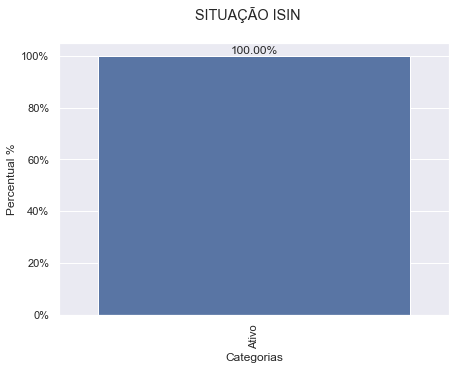

In [110]:
gráficos(dist_freq_cat['SITUAÇÃO ISIN'], 'SITUAÇÃO ISIN')

<p> Aqui é muito importante destacar a coluna "Situação ISIN" com 100% dos ISIN's ativos pois, infere-se disto, que a base de dados é composta apenas por ativos ainda negociados / ativos. Ou seja, a mesma não é uma base histórica com ativos uma vez negociados porém já vencidos,  </p>
<p> Vejamos agora as colunas de destaque para ativos de renda fixa, iniciando pela remuneração atreladas a estes. O gráfico a seguir aponta que a vasta maioria destes ativos (quase 60%) têm o CDI como indexador de referência para sua remuneração, bem acima dos 18,50% dos ativos que remuneram a taxas pré-fixadas ou dos 12,50% do IPCA. Outros indexadores totalizam apenas 10,50% do total. </p>

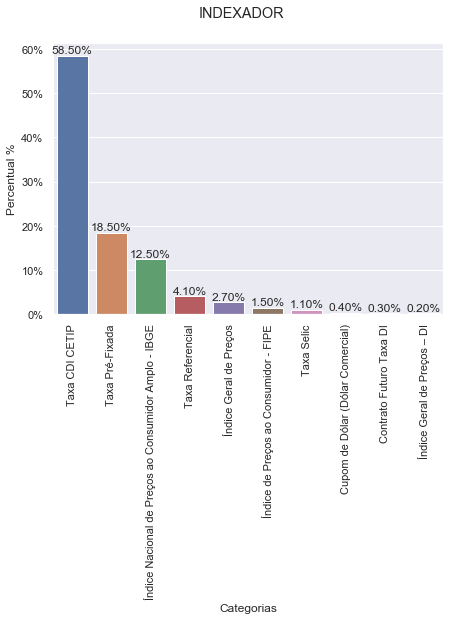

In [20]:
gráficos(dist_freq_cat['INDEXADOR'], 'INDEXADOR')

<p> Nosso próximo gráfico expõe algumas das inconsistências da base e/ou do arquivo "Leiame.pdf" que o descreve. Cerca de 72,80% dos valores não-nulos da coluna "Código frequência de juros", que descreve a periodicidade de pagamento dos juros dos títulos de renda fixa, apresenta a sigla "N", a qual não têm correspondência no dicionário de dados do arquivo de suporte. Além desta, a sigla "D" também não é descrita. As siglas parecem se referir a periodicidades em inglês, e em um trabalho de pura suposição podemos levantar que as siglas correspondam a "Nothing" e "Daily" ("nenhum" e "diário"), mas que apenas podem ser confirmadas com análise mais aprofundada que não será feita aqui.</p>
<p> À parte isso, a periodicidade anual de pagamento dos juros é a mais praticada seguida pela mensal, outras e semestral. </p>

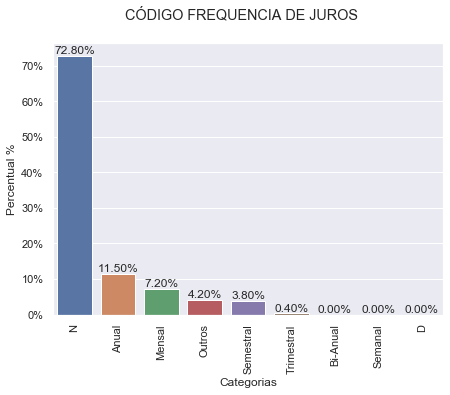

In [21]:
gráficos(dist_freq_cat['CÓDIGO FREQUENCIA DE JUROS'], 'CÓDIGO FREQUENCIA DE JUROS')

<p> As taxas pré-fixadas parecem compor um grupo bem menor (13,70% do total) de tipos de juros quando comparados aos juros variáveis / pós fixados (86,30%), conforme indica o gráfico abaixo. </p>

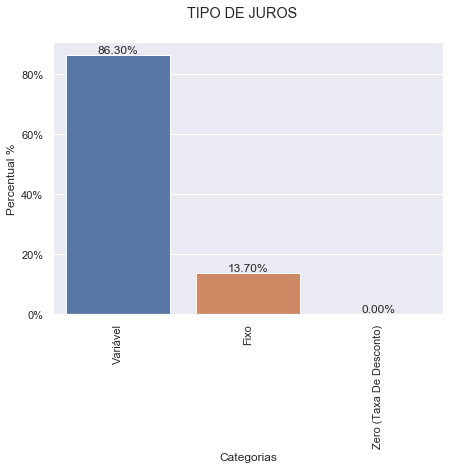

In [22]:
gráficos(dist_freq_cat['TIPO DE JUROS'], 'TIPO DE JUROS')

<p> </p>

<p> Quanto ao vencimento / resgate, ativos com vencimento fixo (58,50%) ou resgate antecipado (32,70%) são os mais comuns, enquanto os demais perfazem apenas 8,70% do total. </p>

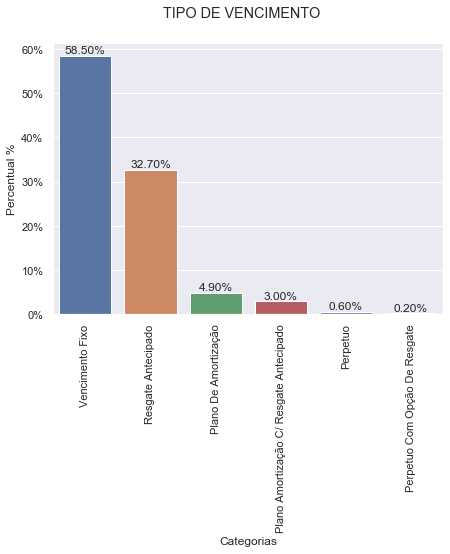

In [23]:
gráficos(dist_freq_cat['TIPO DE VENCIMENTO'], 'TIPO DE VENCIMENTO')

<p> O último gráfico referente ao conjunto de renda fixa revela que a vasta maioria destes ativos (74,10% ) apresentam garantia quirografária, que não asseguram ao detentor qualquer preferência sobre um ativo específico da companhia ou quanto a ordem de pagamento dos credores, em caso de liquidação da companhia, por exemplo. Outros 13,70% envolvem o comprometimento de algum ativo da companhia como garantia específica do título (garantia real), 5,90% apresentam garantia subordinada (após os ativos de garantia quirografária na ordem de preferência de pagamentos) e 4,60% dos ativos detêm garantia pelo Tesouro Nacional (títulos públicos). </p>

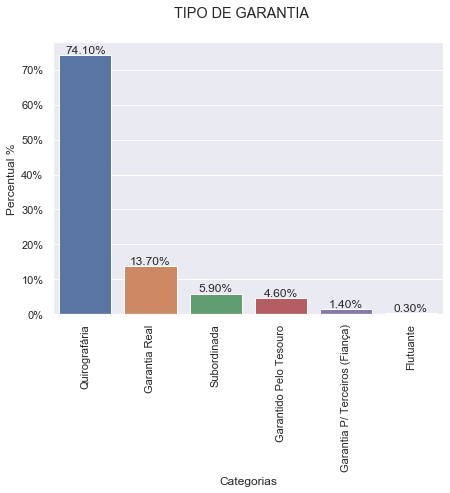

In [112]:
gráficos(dist_freq_cat['TIPO DE GARANTIA'], 'TIPO DE GARANTIA')

<p> Outra importante classe de ativos que o dataset engloba são os fundos de investimento. Em linha com o que encontramos <a href="https://nbviewer.jupyter.org/github/uchoa91/Jupyter-noteboks/blob/master/Info%20cadastrais.ipynb">aqui</a>, percebemos que cerca de 1/4 dos fundos ativos são fechados frente a 3/4 dos fundos que são abertos, conforme o gráfico a seguir: </p>

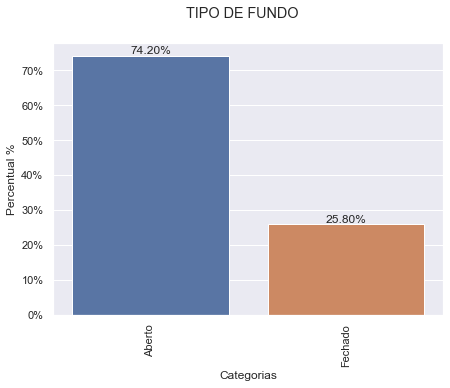

In [25]:
gráficos(dist_freq_cat['TIPO DE FUNDO'], 'TIPO DE FUNDO')

<p> Quanto a sua política de investimentos, cerca de 3/4 dos fundos investem em "Diferentes ativos" e 23,80% em "Outros". Infelizmente os dados desta coluna não são muito claros, impossibilitando uma melhor análise. Porém, ainda citando a análise exploratória realizada com o arquivo de informações cadastrais de fundos de investimento e sabendo que cerca de 65% dos fundos brasileiros são da classe "Multimercado", podemos levantar a hipótese de que os fundos aqui sinalizados com "Diferentes Ativos" sejam fundos multimercado, visto que estes fundos não precisam investir em apenas uma classe de ativos em específico. A confirmação ou não desta hipótese apenas é possível cruzando estes dados com o arquivo de informações cadastrais do fundo, o que não faremos em um primeiro momento neste estudo. </p>
<p> O gráfico de política de distribuição dos fundos revela que praticamente 80% dos mesmos são fundos de crescimento (ou no termo mais conhecido em inglês, de growth), ou seja, são fundos que reinvestem os dividendos ou quaisquer outros proventos recebidos, enquanto apenas 13,20% dos fundos são de renda, distribuindo assim aos cotistas algum valor periodicamente. Novamente, não encontramos correspondência para a letra "J" no arquivo "Leiame.pdf". </p>

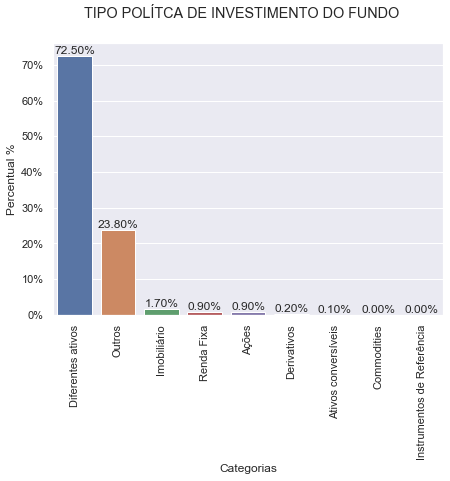

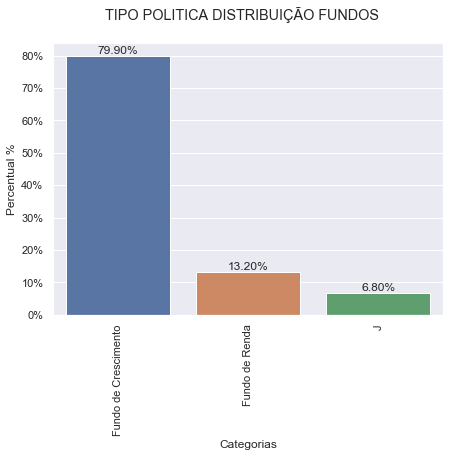

In [26]:
for column in ['TIPO POLÍTCA DE INVESTIMENTO DO FUNDO', 'TIPO POLITICA DISTRIBUIÇÃO FUNDOS']:
    gráficos(dist_freq_cat[column], column)

<p> Vamos nos voltar agora para as colunas que nos revelam um pouco mais sobre os derivativos negociados no Brasil. O gráfico a seguir demonstra a proporção de cada classe de ativo objeto / subjacente sobre o total, revelando quais as que apresentam maior diversidade para o investidor no momento de proteger e/ou alavancar sua posição. 62,30% do total negociado tem ativos de renda variável como ativo subjacente, seguido de moedas e índices como 14,90% e 8,60% cada um, respectivamente. </p>

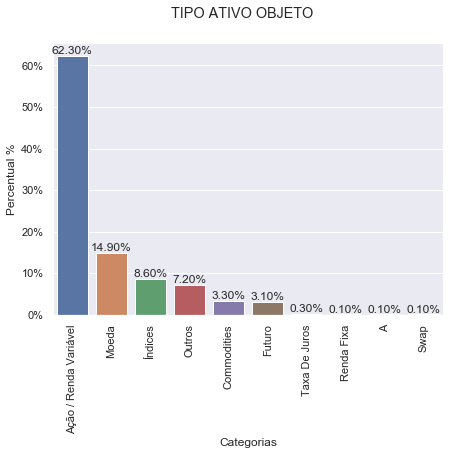

In [114]:
gráficos(dist_freq_cat['TIPO ATIVO OBJETO'], 'TIPO ATIVO OBJETO')

<p> Quando observamos o estilo das opções negociadas, verificamos que cerca de 65% do total são opções européias, ou seja,  aquelas que podem ser exercidas apenas no seu vencimento, enquanto 35% são amercianas, as quais podem ser exercidas a qualquer momento entre a compra e o vencimento. </p>

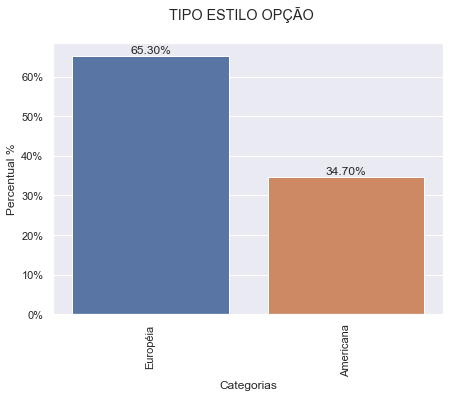

In [120]:
gráficos(dist_freq_cat['TIPO ESTILO OPÇÃO'], 'TIPO ESTILO OPÇÃO')

<p> Para finalizar esta parte de derivativos, o gráfico a seguir revela que a vasta maioria destes ativos têm liquidação física (mais de 80%), enquanto apenas 18,60% tem liquidação financeira, o que surpreende visto a facilidade relativa do último tipo de liquidação frente a primeira. </p>

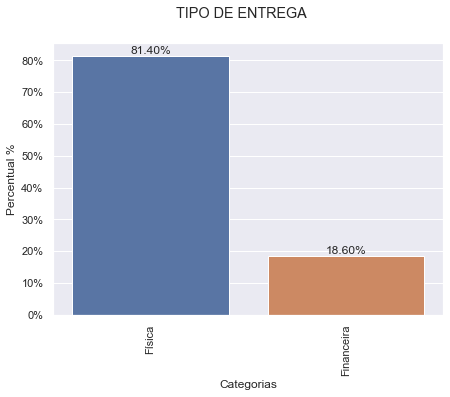

In [115]:
gráficos(dist_freq_cat['TIPO DE ENTREGA'], 'TIPO DE ENTREGA')

<p> De acordo com a coluna "Codigo Categoria" os ativos de renda fixa, opções e fundos, nesta ordem, compõem mais de 90% dos ativos negociados no mercado brasileiro. Frisa-se que tal proporção leva em consideração a quantidade e não o total financeiro de cada classe. </p>

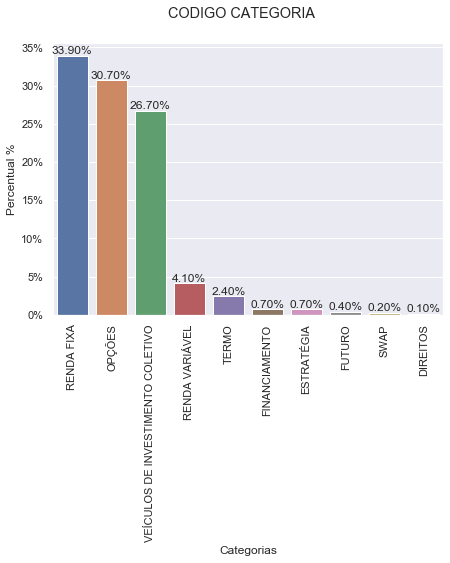

In [111]:
gráficos(dist_freq_cat['CODIGO CATEGORIA'], 'CODIGO CATEGORIA')

<p> Quando estas categorias gerais são expandidas para subclasses de ativos menores, é interessante notar que por esta perspectiva as cotas de fundos são os ativos mais negociados (com os mesmos 26,70% do gráfico anterior, ou seja, estes não foram subdivididos), seguido de CDB's com 17,80% e parcelas muito semelhantes de opções de compra ou venda de ações (cerca de 7% do total). </p>
<p> Esta visão mais detalhada revela e quantifica a importância de ativos emitidos por instituições financeiras (CDB's, letras financeiras e letras de crédito do agronegócio) para a composição do percentual de 33,90% de ativos de renda fixa visto no gráfico anterior, muito superior a contribuição de títulos de dívida emitidos por empresas como as debêntures, por exemplo. Igualmente, destacam-se as contribuições das opções de ações preferenciais ou ordinárias para o total de 30,70% de opções. </p>

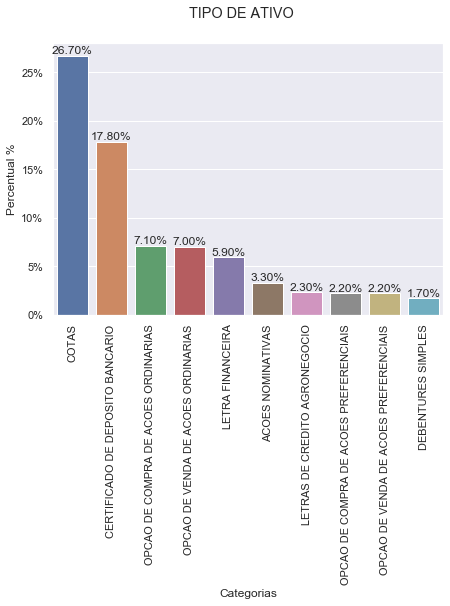

In [110]:
gráficos(dist_freq_cat['TIPO DE ATIVO'], 'TIPO DE ATIVO')

<p> Outras visualizações interessantes a se fazer quando temos ativos financeiros e suas respectivas datas de emissão e vencimento é justamente apresentar um gráfico com estas datas no eixo x e o volume financeiro total no eixo y. Para efeitos de simplificação, visto a complexidade envolvida na obtenção dos preços diários de todos os ativos para o cálculo do volume financeiro, e para manter a consistência com a análise apenas das quantidades dos ativos que viemos fazendo até aqui, faremos uma pequena adaptação ao gráfico para que o mesmo considere as datas  relevantes e a quantidade, ao invés do volume financeiro, para cada classe de ativos. </p>
<p> Antes, porém, teremos de fazer alguns ajustes nas colunas "Data Emissão" e "Data Expiração". Comecemos com a primeira. Para a criação da tabela auxiliar ao gráfico, precisaremos da menor e maior data do período para que sirvam como as extremidades do gráfico. Podemos obtê-las com o seguinte código: </p>

In [188]:
print(isin['DATA EMISSAO'].min())
print(isin['DATA EMISSAO'].max())

1989-10-01 00:00:00
2022-04-15 00:00:00


<p> Observa-se que existem ativos na coluna "Data Emissao" com datas posteriores a data que estamos realizando este trabalho, o que no mínimo é contraintuitivo. Seja por erro na base de dados ou a "antecipação" / "planejamento" de emissões de ativos futuras é razoável que retiremos estes valores e consideremos emissões com data limite apenas até hoje (27/05/2020). </p>
<p> O código a seguir retira então estas datas e calcula a quantidade de emissões de ativos em acumulado para o intervalo entre a mais antiga e mais recente data de emissão encontrada. Em seguida apresentamos o gráfico resultante. </p>

In [113]:
temp = isin.dropna(subset = ['DATA EMISSAO'])
temp = temp[temp['DATA EMISSAO'] <= pd.to_datetime(date.today())]

mínimo = temp['DATA EMISSAO'].min()
máximo = temp['DATA EMISSAO'].max()

index_datas = pd.date_range(start = mínimo, end= máximo)

ativos = temp['CODIGO CATEGORIA'].unique().tolist()
emissão_de_ativos = pd.DataFrame(index=index_datas, columns = ativos)

contador = {str(ativo):0 for ativo in ativos}

for dia in emissão_de_ativos.index:
    
    temp_2 = temp[temp['DATA EMISSAO'] == dia.strftime('%Y-%m-%d')]
    temp_2 = temp_2['CODIGO CATEGORIA'].value_counts()
    
    if temp_2.empty:
        emissão_de_ativos.loc[dia.strftime('%Y-%m-%d'), ativo] = contador[ativo]
    else:
        
        for ativo in temp_2.index:

            contador[ativo] = contador[ativo] + temp_2[ativo]
            emissão_de_ativos.loc[dia.strftime('%Y-%m-%d'), ativo] = contador[ativo]

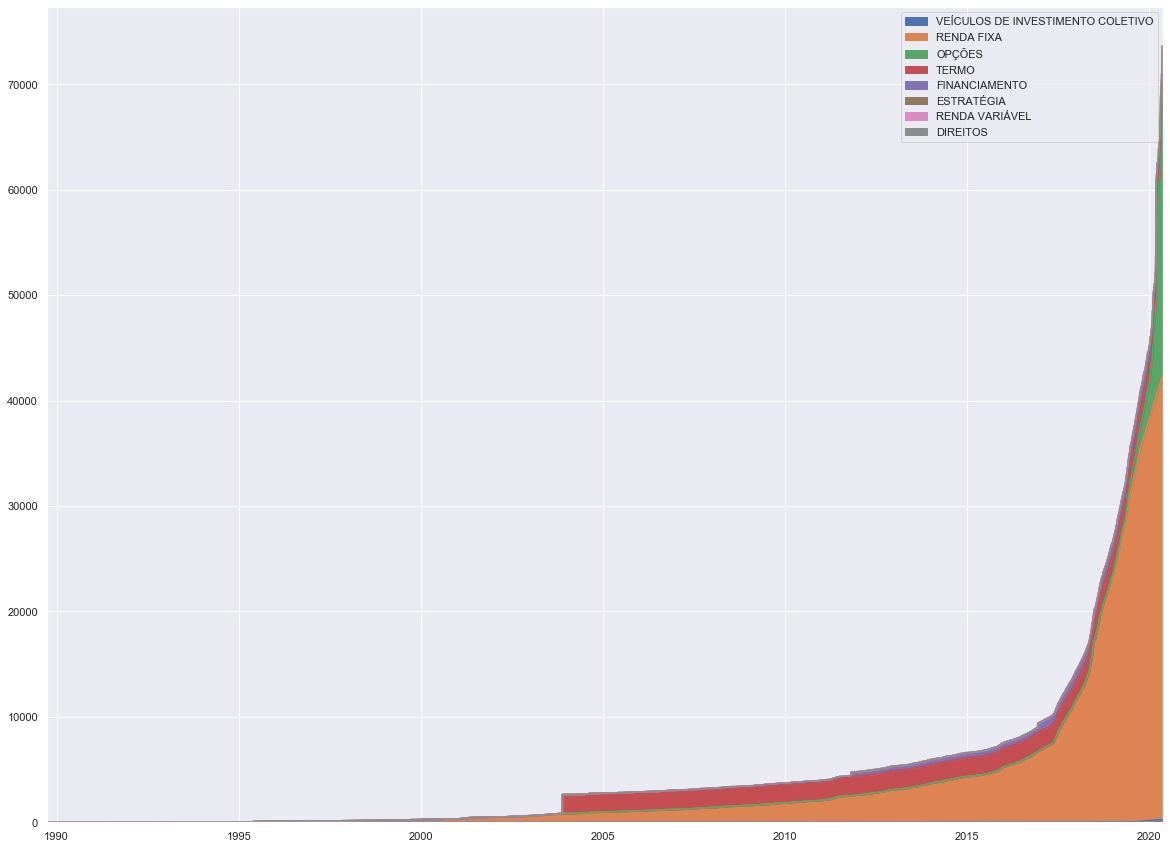

In [114]:
emissão_de_ativos.fillna(method = 'ffill').plot.area(figsize = (20,15))

<p> É interessante notar que o mercado ainda apresenta (alguns poucos) ativos que foram emitidos na década de 1990 e início dos anos 2000, notadamente ativos de renda fixa, porém pouco antes de 2005 temos emissão significativa de termos. Operações a termo tão longas (mais de 15 anos) surpreendem, ainda mais quando a B3 deixa claro em <a href="http://www.b3.com.br/pt_br/produtos-e-servicos/negociacao/renda-variavel/termo-de-acoes.htm">seu site</a> que a data de vencimento máxima para este tipo de operação é de 999 dias corridos. Este é certamente um rico ponto de investigação, de analisar se a base apresenta alguma informação errônea ou se de fato existem operações a termo tão antigas, mas não iremos nos aprofundar a este ponto neste trabalho. </p>
<p> Outra questão interessante é observar a mudança na inclinação da curva em algum momento entre os anos de 2017 e 2018, quando a emissão dos ativos hoje negociados cresceu exponencialmente, o que não deixa de ser natural. Por fim, chama a atenção como as emissões de opções concentram-se no curto prazo, com duração de no máximo 1 ou 2 anos, algo também esperado dadas as características deste tipo de ativo. </p>

<p> Vamos nos voltar agora para a análise dos vencimentos dos títulos (coluna "Data Expiração"). Para tal devemos relembrar do método .info ( ) <a href="#info ( ) ISIN">aqui</a> e perceber que, ao contrário das outras colunas de data ("datetime64[ns]"), a coluna de "Data Expiracao" é do tipo object. Trabalhar com datas em linguagens de programação em geral é um desafio visto os diferentes formatos nos quais estas podem ser representadas, convertidas e manipuladas. Nossa coluna em específico não foi convertida em data e permaneceu como uma coluna de texto na verdade não por uma limitação do python, mas sim da biblioteca pandas que utilizamos. Maiores informações podem ser obtidas <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-timestamp-limits">neste link</a> mas resumidamente, após algumas horas de sono perdidas, o que aconteceu é que a biblioteca compreende até uma data limite (11/04/2262) padrão, enquanto certos ativos apresentavam valores de ano "9999", muitas vezes utilizados apenas como uma forma de contornar a obrigatoriedade de preencher este campo para um ativo que na realidade não tem vencimento. </p>
<p> Precisamos primeiro forçar a conversão com o código abaixo, e vamos chamar o método .info( ) novamente apenas para confirmar a mudança </p>

In [115]:
isin['DATA EXPIRACAO'] = pd.to_datetime(isin['DATA EXPIRACAO'], errors = 'coerce')
isin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124182 entries, 0 to 124181
Data columns (total 44 columns):
DATA DA GERAÇÃO DO ARQUIVO               124182 non-null datetime64[ns]
AÇÃO SOFRIDA PELA INFORMAÇÃO             124182 non-null object
CÓDIGO ISIN                              124182 non-null object
CODIGO EMISSOR                           124182 non-null object
CODIGO CFI                               124182 non-null object
DESCRICAO                                124182 non-null object
ANO EMISSAO                              73682 non-null Int64
DATA EMISSAO                             73682 non-null datetime64[ns]
ANO EXPIRACAO                            82273 non-null Int64
DATA EXPIRACAO                           82266 non-null datetime64[ns]
TAXA JUROS                               17588 non-null float64
MOEDAS                                   124182 non-null object
VALOR NOMINAL                            69030 non-null float64
PRECO EXERCICIO                        

<p> Pronto, constatamos que a coluna "Data Expiração" foi adequadamente transformada em uma coluna de datas. Interessante notar que antes, como coluna de texto, o método .info( ) não identificava valores nulos na coluna, o que passou a ocorrer com a transformação da coluna para o tipo "data". O que acaba por fazer mais sentido visto que alguns tipos de ativos como ações, fundos, etc. de fato não tem data de vencimento, apresentando assim valores nulos para esta coluna. O parâmetro "errors = 'coerce'" no código acima considera como NaT ("Not a time"; uma data não válida) qualquer data fora do intervalo válido, o que é nosso objetivo.</p>
<p> Vejamos quais as datas limites (menor e maior data) da coluna "Data Expiração" para a exibição do gráfico. </p>

In [116]:
print(isin['DATA EXPIRACAO'].min())
print(isin['DATA EXPIRACAO'].max())

2020-04-26 00:00:00
2121-07-25 00:00:00


<p> Visto o pequeno número de ativos com vencimento maior que 30 anos e para que o gráfico não fique distorcido, vamos definir este vencimento como limite do gráfico. Vejamos como o mesmo fica com o código abaixo:</p>

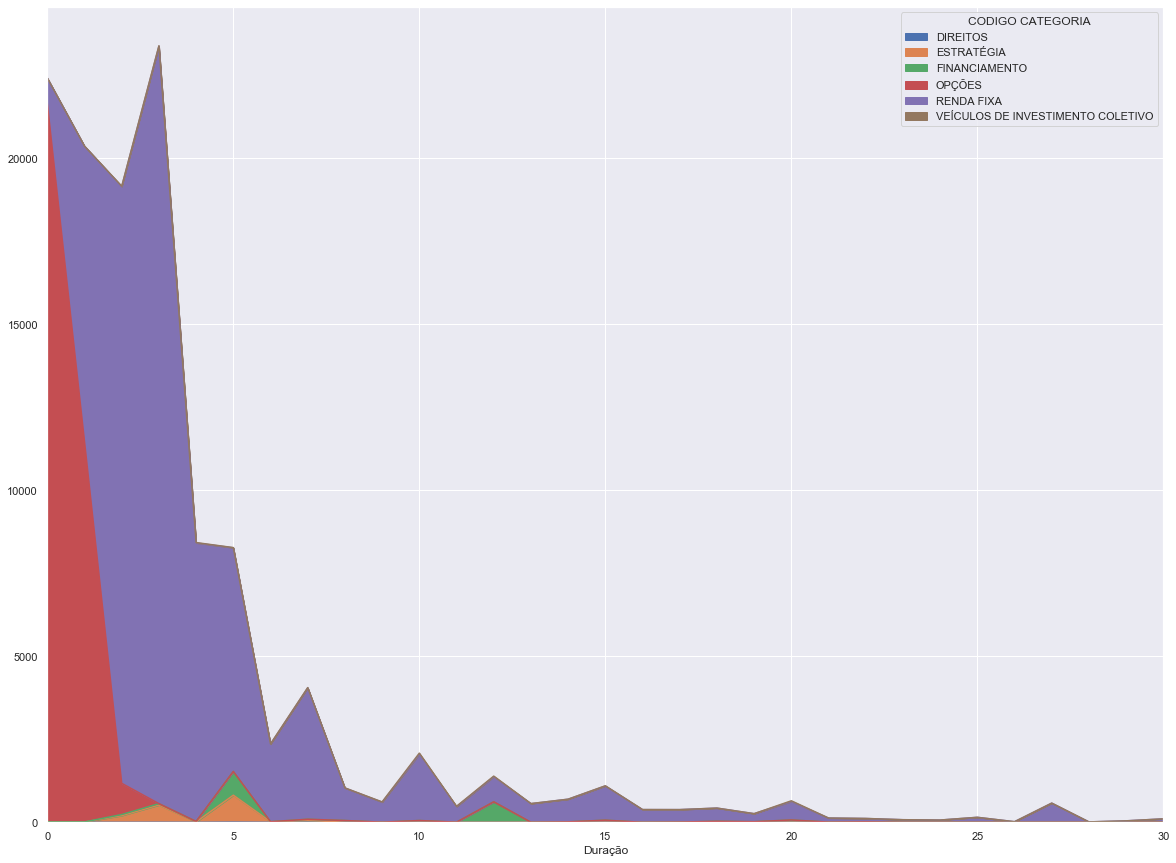

In [117]:
isin['Duração'] = isin['DATA EXPIRACAO'] - isin['DATA EMISSAO']
temp = isin.dropna(subset = ['Duração'])
temp = temp[['CODIGO CATEGORIA', 'Duração']]
temp = temp[temp['Duração'] <= timedelta(days = 365 * 30)]
temp['Duração'] = round(temp['Duração'] / np.timedelta64(1, 'Y'))
temp = pd.pivot_table(temp, columns = ['CODIGO CATEGORIA'], index = ['Duração'], values = ['Duração'], aggfunc = np.count_nonzero)
temp.plot.area(figsize = (20,15))

<p> Aqui novamente podemos perceber como as opções têm vencimentos bem mais curtos, com a maioria se encerrando em até dois anos de sua emissão, enquanto ativos de renda fixa já apresentam maior variedade de vencimentos, ainda que títulos com duração maior que 20 anos sejam raros e que a grande maioria tenha vencimento menor que seis anos. </p>

<p> Por fim vamos avaliar o arquivo de <a name= '2.3 - Emissores'>Emissores</a>, verificando alguns dos seus registros e sua estrutura com os códigos a seguir: </p> 

In [118]:
emissor.head() 

,Código do emissor,Nome do emissor,CNPJ do emissor,Data criação do emissor
0,0002,XPCE VII - FUNDO DE INVESTIMENTO EM DIREITOS C...,30077584000164,2018-07-03
1,0003,CSHG 1534 FUNDO INVESTIMENTO MULTIMERCADO PREV...,22899250000148,2018-07-03
2,0004,SANTANDER PB MARCELLINI MULTIMERCADO CREDITO P...,30102322000102,2018-07-03
3,0005,KINEA VÉRTICE FUNDO INVESTIMENTO DIREITOS CRED...,29986319000110,2018-07-03
4,0006,ITAÚ FLEXPREV PLATINUM CRÉDITO PRIVADO RENDA F...,29197109000142,2018-07-03


In [119]:
emissor.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38460 entries, 0 to 38459
Data columns (total 4 columns):
Código do emissor          38460 non-null object
Nome do emissor            38460 non-null object
CNPJ do emissor            37451 non-null object
Data criação do emissor    38460 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 1.2+ MB


<p> Este arquivo é relativamente pequeno, comparado aos outros arquivos, com apenas quatro colunas e 38.460 registros. O mesmo apresenta a data de criação do emissor, seu nome, CNPJ e o código do emissor. Algo muito bom deste arquivo é que pouquíssimos registros estão zerados (apenas a coluna "CNPJ do emissor" tem alguns registros assim). </p>

<p> Apesar de pequeno este arquivo é super importante pois será através dele que conseguiremos linkar os dois arquivos maiores de informações cadastrais e ativos negociados (ISIN). Isto será possível com a correspondência entre as colunas "Código do emissor" do arquivo de ISIN e de emissor, e entre a coluna "CNPJ da companhia" do arquivo de informações cadastrais e a coluna "CNPJ do emissor" dos outros arquivos.</p>

<p> Porém, o formato dos CNPJ's nestes arquivos são diferentes. Enquanto no arquivo de informações cadastrais os CNPJ's são apresentados com pontos, traços e barras, no de emissor o mesmo é representado apenas por números. Vamos utilizar, no código abaixo, uma função para transformar os dados apenas numéricos do arquivo de emissor para o mesmo formato do arquivo de informações cadastrais, e confirmar a mudança com o método .head( ). </p>

In [120]:
transformação = lambda x: x if pd.isna(x) else x[:2]+'.'+x[2:5]+'.'+x[5:8]+'/'+x[8:12]+'-'+x[12:]
emissor['CNPJ do emissor'] = emissor['CNPJ do emissor'].transform(transformação)
emissor.head()

,Código do emissor,Nome do emissor,CNPJ do emissor,Data criação do emissor
0,0002,XPCE VII - FUNDO DE INVESTIMENTO EM DIREITOS C...,30.077.584/0001-64,2018-07-03
1,0003,CSHG 1534 FUNDO INVESTIMENTO MULTIMERCADO PREV...,22.899.250/0001-48,2018-07-03
2,0004,SANTANDER PB MARCELLINI MULTIMERCADO CREDITO P...,30.102.322/0001-02,2018-07-03
3,0005,KINEA VÉRTICE FUNDO INVESTIMENTO DIREITOS CRED...,29.986.319/0001-10,2018-07-03
4,0006,ITAÚ FLEXPREV PLATINUM CRÉDITO PRIVADO RENDA F...,29.197.109/0001-42,2018-07-03


<p> Agora sim poderemos cruzar os arquivos e analisá-los em conjunto. </p>

## <a name= '3 - Análise Conjunta'> 4 - Análise Conjunta </a>

<p> Nesta última sessão vamos buscar analisar os arquivos de maneira conjunta, investigando algum insight relevante que possamos obter dos dados. </p>
<p> Em um primeiro momento podemos nos questionar quais os maiores emissores individuais (não considerados conglomerados, etc.) de acordo com o arquivo de "ISIN", separado por categorias de ativos. Para tal obteremos os nomes dos emissores do arquivo "Emissor", fazendo a correspondência entre as colunas "Código emissor" em ambos os arquivos. O gráfico apresenta em ordem decrescente do total dos ativos os 10 maiores emissores do mercado brasileiro. Frisa-se que o eixo y está em escala log para melhor observação. </p>

C:\Users\marce\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\marce\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1208: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


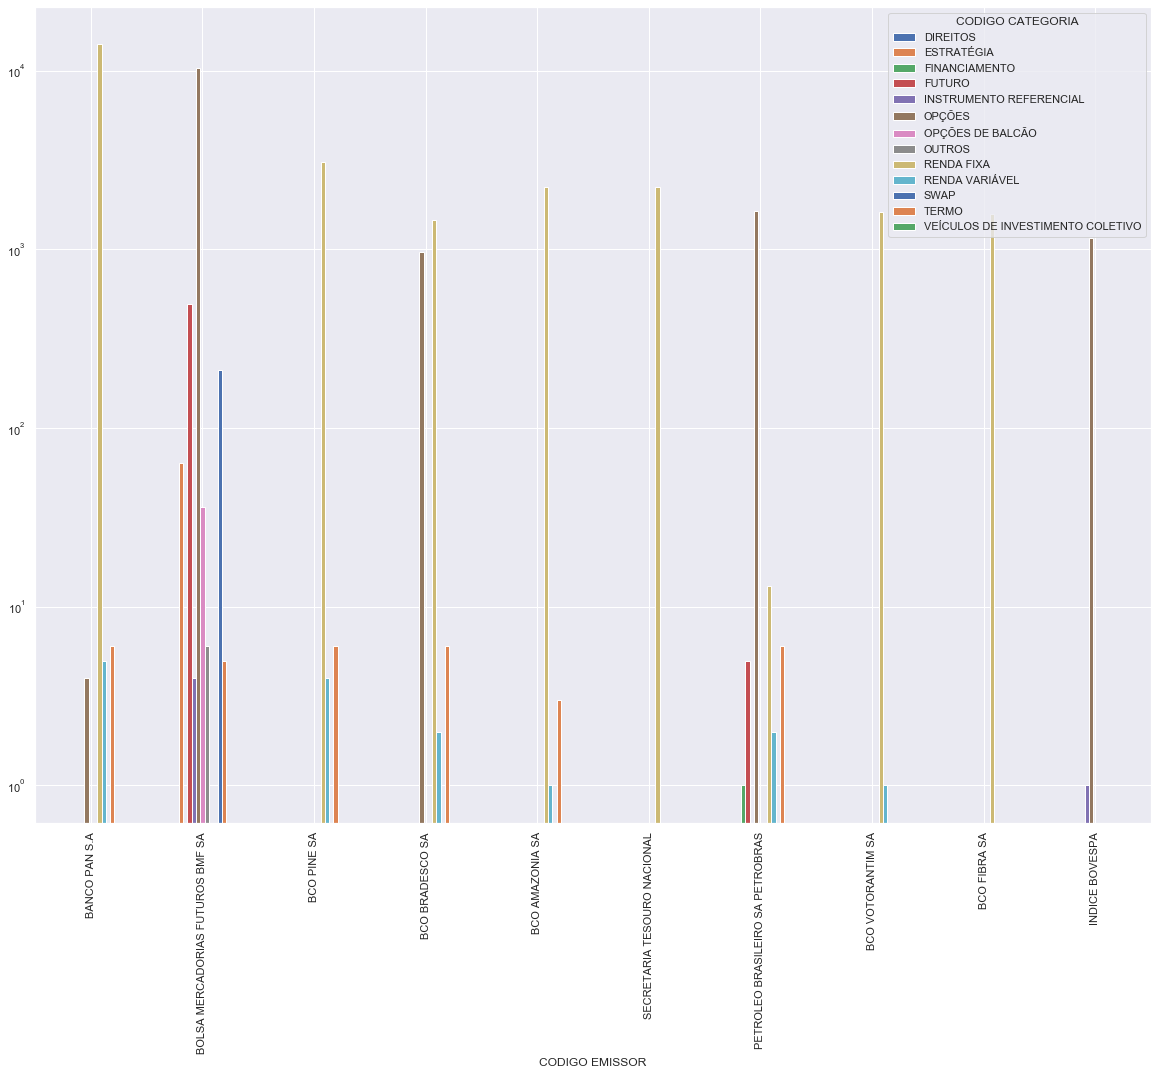

In [121]:
conversão_emissor = {emissor.loc[index, 'Código do emissor']:emissor.loc[index, 'Nome do emissor'] for index in emissor.index}

temp = isin[['CODIGO EMISSOR', 'CODIGO CATEGORIA']]
temp['CODIGO EMISSOR'].replace(conversão_emissor, inplace = True)

temp = temp.groupby('CODIGO EMISSOR')['CODIGO CATEGORIA'].value_counts().unstack().fillna(0)
temp['total'] = temp.sum(axis=1)

temp.sort_values(by=['total'], ascending = False, inplace = True)
temp.drop(columns = ['total']).head(10).plot(kind = 'bar', logy = True, figsize = (20,15))

<p> Como revela o gráfico acima, o Banco Pan é o maior emissor (em quantidade) de ativos no mercado brasileiro. Bancos, aliás, ocupam 6 dos 10 primeiros lugares. Outro destaque é em segundo lugar a B3, tanto pela variedade de categorias de ativos emitidos quanto pela quantidade, o que é de se esperar levando em conta que é, atualmente, a única bolsa brasileira. Outros dois destaques na lista são o Tesouro Nacional, presente devido as emissões de títulos de dívida do governo federal (títulos públicos), e a Petrobras, única empresa não financeira entre os 10 maiores emissores, compondo a lista muito por ser umas das empresas mais líquidas da bolsa e uma das principais empresas na composição do Ibovespa. </p>
<p> O gráfico a seguir é bem semelhante, porém agrupa os emissores pelos respectivos setores de cada empresa, de acordo com o arquivo de informações cadastrais de companhias abertas.  </p>

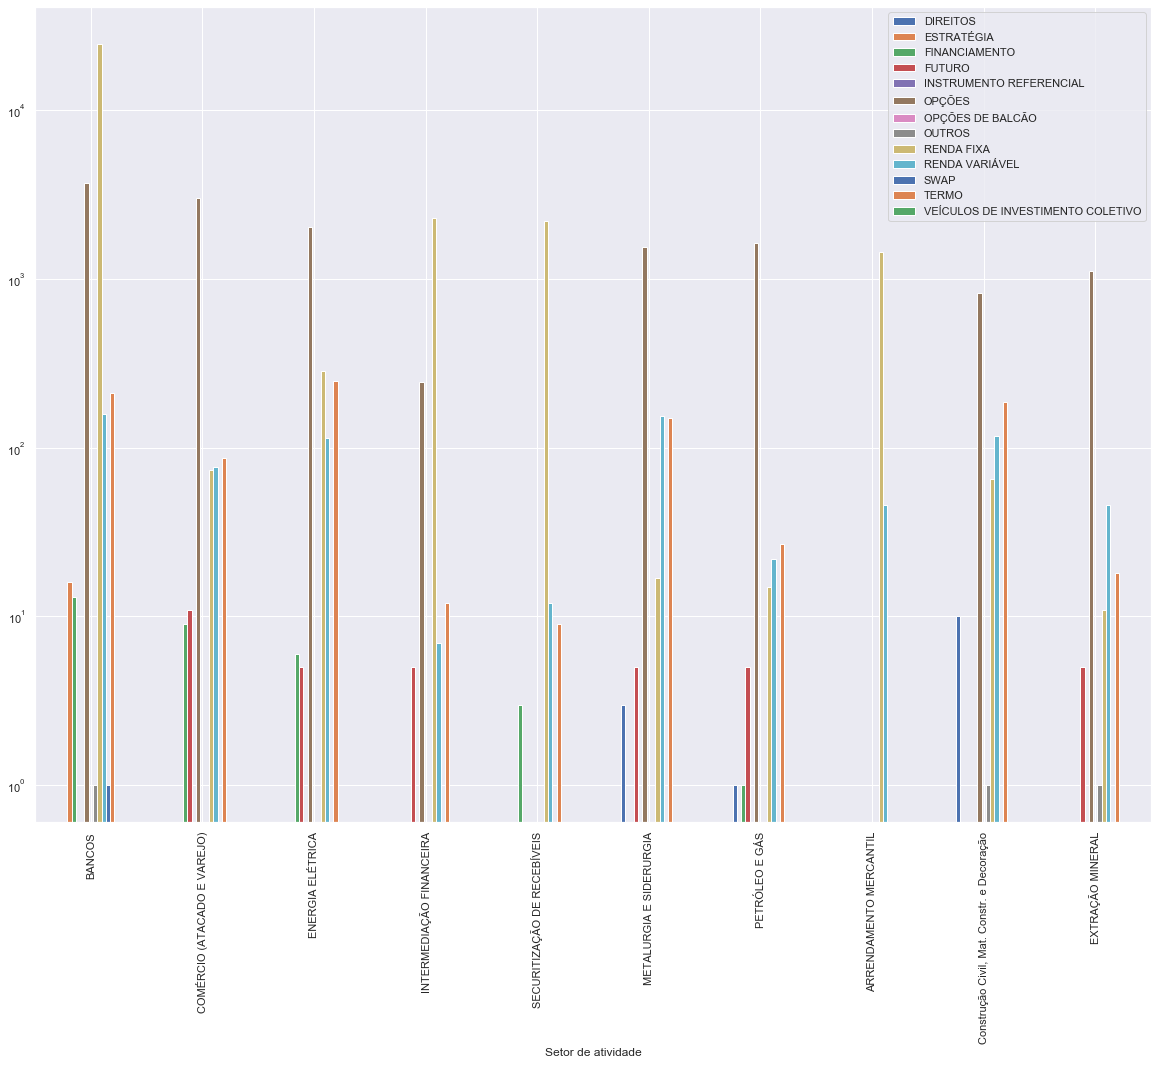

In [123]:
temp = isin[['CODIGO EMISSOR', 'CODIGO CATEGORIA']]

temp = temp.groupby('CODIGO EMISSOR')['CODIGO CATEGORIA'].value_counts().unstack().fillna(0)

temp = temp.join(emissor[['CNPJ do emissor', 'Código do emissor']].set_index('Código do emissor'), how = 'left')
temp = temp.set_index('CNPJ do emissor').join(informações_cadastrais_cias_abertas[['CNPJ da companhia', 'Setor de atividade']].set_index('CNPJ da companhia'))
temp = temp.dropna(subset = ['Setor de atividade'])

temp = temp.groupby(['Setor de atividade']).sum()
temp['total'] = temp.sum(axis=1)
temp.sort_values(by=['total'], ascending = False, inplace = True)
temp.drop(columns = ['total']).head(10).plot(kind='bar', figsize = (20,15), logy = True)

<p> Com esta visualização, confirmamos que o setor bancário é o que apresenta os principais emissores de ativos do mercado de capitais nacional, tendo nos títulos de renda fixa a categoria que mais contribuiu para esta liderança. </p>
<p> Por fim, podemos relembrar a definição das categorias CVM <a href="#Categorias">aqui</a> e avaliar possíveis inconsistências nos dados ao nos questionar se de fato apenas empresas de categoria A emitiram ações, certificado de depósito de ações ou títulos conversíveis a algum destes ativos. </p>.

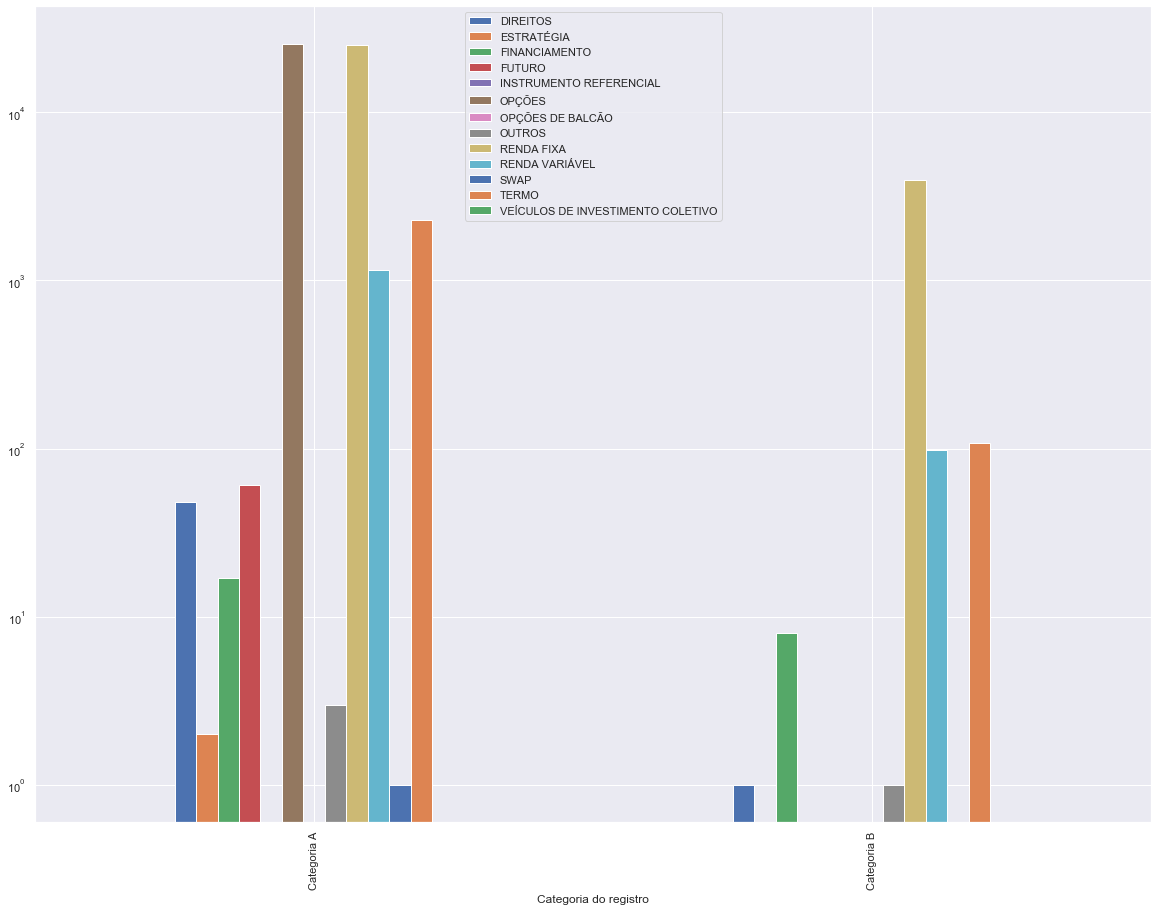

In [232]:
temp = isin[['CODIGO EMISSOR', 'CODIGO CATEGORIA']]

temp = temp.groupby('CODIGO EMISSOR')['CODIGO CATEGORIA'].value_counts().unstack().fillna(0)

temp = temp.join(emissor[['CNPJ do emissor', 'Código do emissor']].set_index('Código do emissor'), how = 'left')
temp = temp.set_index('CNPJ do emissor').join(informações_cadastrais_cias_abertas[['CNPJ da companhia', 'Categoria do registro']].set_index('CNPJ da companhia'))
temp = temp.dropna(subset = ['Categoria do registro'])

temp.groupby(['Categoria do registro']).sum().plot(kind='bar', figsize = (20,15), logy = True)
plt.legend(loc = 'upper center')

<p> Podemos observar que empresas de categoria B emitiram ativos de renda fixa e variável, mas apenas esta informação é inconclusiva para nossos objetivos. Precisamos investigar em maior detalhe quais os ativos emitidos, não apenas sua categoria. </p>
<p> Para isso nos utilizaremos do cóidgo a seguir, filtrando os emissores que são consideradas companhias Categoria B pela CVM e obtendo os diferentes tipos de ativos emitidos.</p>

In [239]:
temp_2 = isin[['CODIGO EMISSOR', 'TIPO DE ATIVO']].set_index('CODIGO EMISSOR')
temp_2 = temp_2.join(emissor[['CNPJ do emissor', 'Código do emissor']].set_index('Código do emissor'), how = 'left')
temp_2 = temp_2.set_index('CNPJ do emissor')
temp_2 = temp_2.loc[temp[temp['Categoria do registro'] == 'Categoria B'].index]
pd.DataFrame(temp_2['TIPO DE ATIVO'].unique(), columns = ['Ativos'])

,Ativos
0,DEBENTURES SIMPLES
1,ACOES NOMINATIVAS
2,NOTA PROMISSORIA
3,TERMO NORMAL DE ACOES ORDINARIAS
4,TERMO FLEXIVEL DE ACOES ORDINARIAS
5,TERMO EM DOLAR DE ACOES ORDINARIAS
6,TERMO NORMAL DE ACOES PREFERENCIAIS
7,TERMO FLEXIVEL DE ACOES PREFERENCIAIS
8,TERMO EM DOLAR DE ACOES PREFERENCIAIS
9,CERTIFICADOS DE RECEBIVEIS DO AGRONEGOCIO


<p> Dentre a lista de ativos negociados, percebe-se que temos "Ações resgatáveis", "Ações nominativas", e "Debêntures conversíveis em ações ordinárias", ativos estes que a princípio não seriam permitidos a negociação por empresas de Categoria B da CVM. </p>
<p> Esta não é, porém, uma conclusão definitiva, pois uma série de análises quanto a consistência dos dados deve ser feita para se chegar a uma definição. Por exemplo, é necessário analisar se a informação de "Categoria CVM" da base de informações cadastrais de companhias abertas é consistente e atualizada, se os emissores e tipos de ativos estão corretos na base de dados de ISIN, entre outros. </p>
<p> Apesar disto, cumpre nosso objetivo de cruzar dados de diferentes fontes, e de levantar e testar hipóteses com base nestas informações, sendo assim fonte para estudos e questionamentos futuros. </p>

## <a name= '4 - Conclusão'> 4 - Conclusão  </a>

<p> Foi uma jornada e tanto referente as companhias abertas brasileiras e os valores mobiliários emitidos e/ou negociados no nosso mercado de capitais! Aqui pudemos aplicar um pouco mais dos conhecimentos de python e data science para descobrir um pouco mais sobre as características mais importantes de ativos e empresas, desta vez analisando não apenas uma, mas três bases de dados distintas, cruzando seus dados mais relevantes para encontrar insights valiosos. </p>
<p> Espero que, para os que tenham chegado até aqui, esta tenha sido uma trajetória de descobertas interessantes, e feedbacks são sempre bem-vindos! Até a próxima! </p>